# Case Fraude

Fraudes financeiras são atos ilícitos que visam obter benefícios financeiros indevidos por meio de engano, falsificação, manipulação ou omissão de informações. Essas ações têm o potencial de causar danos financeiros e reputacionais às vítimas, que podem ser pessoas físicas, empresas ou instituições públicas.

Para proteger o patrimônio, a reputação e a confiança dos envolvidos nas transações financeiras, é fundamental evitar fraudes financeiras. Além disso, a prevenção de fraudes financeiras ajuda a combater a lavagem de dinheiro, a corrupção, o terrorismo e outros crimes que ameaçam a segurança e an estabilidade da sociedade.

É necessário adotar controle interno, educação financeira, monitoramento e denúncia para evitar fraudes financeiras. Algumas dessas ações incluem:

 * Verifique se os documentos, as assinaturas e os dados cadastrais dos clientes são verdadeiros de acordo com as regras e procedimentos internos de uma instituição financeira.
 * Usar senhas fortes e exclusivas, evitar compartilhar senhas com outras pessoas e alterá-las regularmente.
 * Não abra e-mails, mensagens ou links suspeitos que possam conter phishing, vírus ou malware.
 * Não fornecer dados pessoais, bancários ou financeiros por telefone, e-mail ou redes sociais sem verificar an identidade e an origem do solicitante
 * Desconfie de ofertas extremamente vantajosas que prometem lucros garantidos, rápidos ou fáceis.
 * Verifique se houve movimentações ou cobranças indevidas nos relatórios de investimentos, faturas de cartão de crédito e extratos bancários.
 * Denunciar imediatamente qualquer suspeita ou ocorrência de fraude financeira aos órgãos competentes, como a polícia, o banco, o órgão regulador ou o serviço de proteção ao crédito.



<center>
<img src = "https://th.bing.com/th/id/OIG.Q2Asf6PXerKQ9GkvVECD?pid=ImgGn" width = "60%">
Image by studiogstock</a> on Microsoft Bing
</center>

Com a ajuda de cientistas de dados pode-se fazer o seguinte:

 * Examinar dados de várias fontes e formatos, como registros, documentos, transações, mídias sociais e dispositivos, entre outros, para encontrar padrões, anomalias, comportamentos e relações que possam indicar an ocorrência ou a tentativa de fraude.
 * Desenvolver e aplicar modelos estatísticos, algoritmos e técnicas de aprendizado de máquina para detectar e prever eventos fraudulentos com dados históricos e em tempo real.
 * Construir e executar soluções de inteligência artificial, como sistemas de pontuação, alertas, recomendações e bloqueios, para automatizar e otimizar o processo de prevenção de fraudes e reduzir os falsos positivos, os custos operacionais e os riscos legais.
 * Os resultados das análises devem ser transmitidos de forma compreensível, visual e clara para ajudar os gestores, auditores, investigadores e autoridades competentes a tomar decisões e agir.

Como resultado, o cientista de dados é um profissional que ajuda a proteger o patrimônio, a legitimidade e a confiança das instituições financeiras e de seus clientes utilizando dados e análises para combater a fraude.


# Dataset

No Dataframe que iremos trabalhar, temos as seguintes informações:

* A pontuação de 1 a 10 são notas de um escritório de crédito que a empresa obteve para descobrir se o comprador é confiável ou outros dados anonimizados que não temos informações sobre o país: pais de compra
* Produto: produto que está sendo comprado no e-commerce
* A categoria_produto indica a categoria na qual esse produto se encaixa.
* Entrega_doc_1 a entrega_doc_3: Documentos necessários para fazer a conta. 0 = N = não forneceu nada. Y = 1 = entregou. Se estiver vazio, pense que não entregou
* Score_fraude_modelo é a pontuação que o modelo atual fornece. É a probabilidade de que essa compra seja um engano. A probabilidade de que o modelo seja fraudulento aumenta à medida que se aproxima de 100.
* Fraude: informações sobre se a compra foi falsa ou não. Foi adicionado após alguns dias para obter opiniões reais sobre se era fraudulento ou não. 0 se não era fraudulento e 1 se era.

Informações relevantes:

* Para esse caso, os dados são propositalmente anonimizados.
* Você precisará fazer algumas suposições para resolvê-lo. Verifique todas as suposições que fazer.
* Sabemos que a empresa perde cem por cento do valor de cada pagamento aprovado corretamente, enquanto perdemos cem por cento do valor de cada fraude aprovada.


# Importando dados

In [5]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [180]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [181]:
pip install xgboost

     --------------------------------------- 99.7/99.7 MB 22.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [183]:
pip install xgboost lightgbm

     ---------------------------------------- 1.3/1.3 MB 12.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install category_encoders

Iremos importar as bibliotecas que iremos usar no decorrer do projeto.

In [384]:
# Bibliotecas padrão para manipulação dos dados
import pandas as pd
import numpy as np
import datetime as dt

# Bibliotecas estatisticas
from scipy.stats import ttest_ind, chi2_contingency, kstest, ks_2samp

# Análise dos dados
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Machine Learning
from sklearn.model_selection import (train_test_split, cross_val_score, StratifiedKFold, 
                                     GridSearchCV, KFold, RandomizedSearchCV)
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import category_encoders as ce
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                             ConfusionMatrixDisplay, roc_curve, auc)

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Importando o dataframe
df_original = pd.read_csv('C:/Users/Winicius/Desktop/Pastas/PED/dados.csv', sep = ',')

In [9]:
# Criando uma cópia para casos de fazer alterações, ainda teremos o principal
df = df_original.copy()

# Análise Explratória dos dados (EDA)

In [10]:
# Verificando as 5 primeiras colunas para nos familiarizarmos com os dados
df.head()

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,data_compra,valor_compra,score_fraude_modelo,fraude
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,0.883598,240.0,102.0,1,NaN,N,2020-03-27 11:51:16,5.64,66,0
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,0.376019,4008.0,0.0,1,Y,N,2020-04-15 19:58:08,124.71,72,0
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,0.516368,1779.0,77.0,1,NaN,N,2020-03-25 18:13:38,339.32,95,0
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,0.154036,1704.0,1147.0,1,NaN,Y,2020-04-16 16:03:10,3.54,2,0
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,0.855798,1025.0,150.0,1,NaN,N,2020-04-02 10:24:45,3.53,76,0


In [11]:
# Verificando o tamanho do Dataframe
df.shape

(150000, 20)

In [12]:
# Verificando os tipos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   score_1              150000 non-null  int64  
 1   score_2              137016 non-null  float64
 2   score_3              137016 non-null  float64
 3   score_4              149635 non-null  float64
 4   score_5              150000 non-null  float64
 5   score_6              149989 non-null  float64
 6   pais                 149806 non-null  object 
 7   score_7              150000 non-null  int64  
 8   produto              150000 non-null  object 
 9   categoria_produto    150000 non-null  object 
 10  score_8              150000 non-null  float64
 11  score_9              149989 non-null  float64
 12  score_10             149635 non-null  float64
 13  entrega_doc_1        150000 non-null  int64  
 14  entrega_doc_2        41143 non-null   object 
 15  entrega_doc_3    

In [13]:
# Verificando a quantidade de valores faltantes
df.isnull().sum()

score_1                     0
score_2                 12984
score_3                 12984
score_4                   365
score_5                     0
score_6                    11
pais                      194
score_7                     0
produto                     0
categoria_produto           0
score_8                     0
score_9                    11
score_10                  365
entrega_doc_1               0
entrega_doc_2          108857
entrega_doc_3               0
data_compra                 0
valor_compra                0
score_fraude_modelo         0
fraude                      0
dtype: int64

In [14]:
# Verificando a porcentagem dos valores faltantes
(df.isnull().sum()/df.shape[0]*100).round(3)

score_1                 0.000
score_2                 8.656
score_3                 8.656
score_4                 0.243
score_5                 0.000
score_6                 0.007
pais                    0.129
score_7                 0.000
produto                 0.000
categoria_produto       0.000
score_8                 0.000
score_9                 0.007
score_10                0.243
entrega_doc_1           0.000
entrega_doc_2          72.571
entrega_doc_3           0.000
data_compra             0.000
valor_compra            0.000
score_fraude_modelo     0.000
fraude                  0.000
dtype: float64

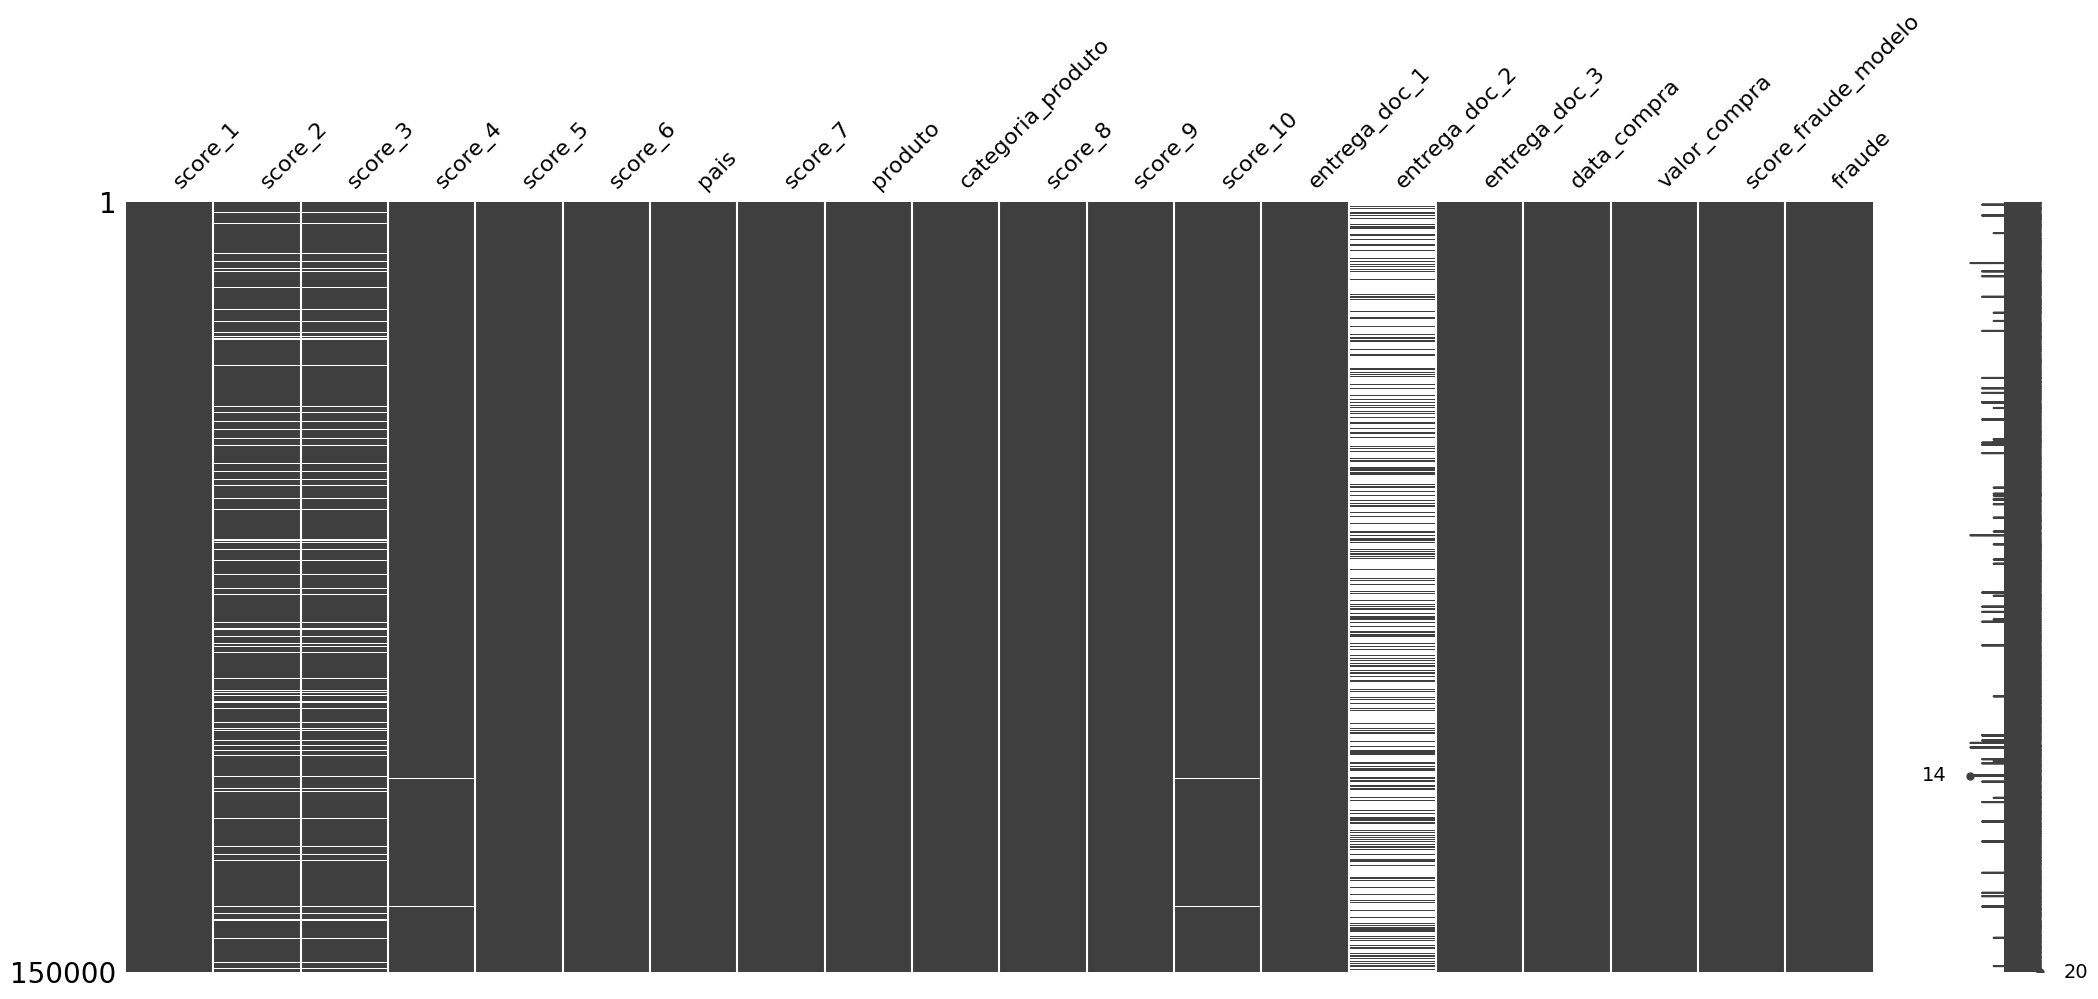

In [15]:
missingno.matrix(df);

É evidente que a variável entrega_doc_2 apresenta uma grande quantidade de valores ausentes, mas essa falta de informação pode ser um bom indicador para detectar possíveis fraudadores. Tendo isso em mente, mais adiante, iremos transformar essa variável em uma coluna booleana, na qual os clientes que não entregaram os documentos serão representados por 0 e os que entregaram por 1.

## Análises

### Fraudadores

In [16]:
# Contar a quantidade de valores 1 'Fraude' e 0 'real' na coluna fraude
contagem_fraude = df['fraude'].value_counts()
contagem_fraude

fraude
0    142500
1      7500
Name: count, dtype: int64

In [17]:
# Calcular a porcentagem de cada valor
porcentagem_fraude = contagem_fraude/df.shape[0]*100

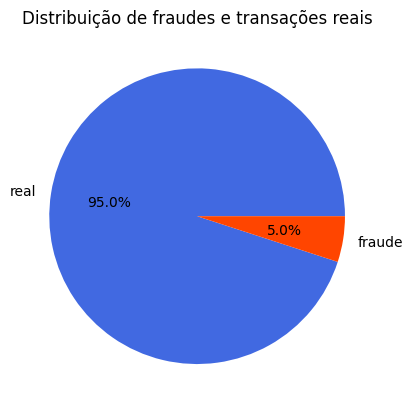

In [18]:
plt.pie(porcentagem_fraude, labels=['real', 'fraude'], autopct='%1.1f%%', colors=['#4169E1', '#FF4500']) 
plt.title('Distribuição de fraudes e transações reais') 
plt.show()

Observa-se uma grande discrepância entre os valores, sendo que apenas 5% correspondem a clientes que cometeram fraude.

### Análise Estatistica

In [19]:
df.describe()

,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,entrega_doc_1,valor_compra,score_fraude_modelo,fraude
count,150000.000000,137016.000000,1.370160e+05,149635.000000,150000.000000,149989.000000,150000.000000,150000.000000,149989.000000,149635.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,3.705407,0.728115,2.604451e+05,21.677669,0.220641,51.169352,14.193513,0.497532,2305.409403,299.969579,0.902353,43.523134,48.066240,0.050000
std,0.753206,0.132943,8.464361e+05,20.062146,2.434995,709.472904,14.161216,0.288348,1712.379601,321.075806,0.296837,91.557888,28.995122,0.217946
min,1.000000,0.000000,1.600000e-01,0.000000,0.000000,-5.000000,0.000000,0.000004,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000
25%,4.000000,0.678400,9.679915e+03,2.000000,0.000000,1.000000,3.000000,0.246819,910.000000,42.000000,1.000000,9.380000,23.000000,0.000000
50%,4.000000,0.755500,4.371165e+04,14.000000,0.104875,8.000000,9.000000,0.495990,1937.000000,193.000000,1.000000,20.610000,48.000000,0.000000
75%,4.000000,0.806500,1.454436e+05,50.000000,0.282938,33.000000,21.000000,0.746508,3445.000000,459.000000,1.000000,40.692500,73.000000,0.000000
max,4.000000,1.000000,1.387874e+07,50.000000,833.333333,145274.000000,58.000000,0.999995,7544.000000,2225.000000,1.000000,3696.350000,100.000000,1.000000


Com base nas informações estatísticas obtidas com o método describe, podemos tirar algumas informações relevantes sobre os dados. Sendo elas:


score_1 e score_2:

* A média do score_1 é de aproximadamente 3.71, com um desvio padrão de 0.75.
* A média do score_2 é de aproximadamente 0.73, com um desvio padrão de 0.13.
* Ambos os atributos parecem ter uma distribuição próxima de uma distribuição normal, pois a média e a mediana (valor mediano) estão próximas.


score_3 e score_4:

* O score_3 tem uma média de cerca de 260.445 e um desvio padrão de aproximadamente 846.436, o que indica uma alta variabilidade nos scores. O valor mínimo é 0.16 e o valor máximo é 13878740, o que mostra uma grande amplitude na distribuição. O valor do terceiro quartil é 145443.6, o que significa que 75% dos clientes têm score menor ou igual a esse valor, enquanto os 25% restantes têm scores muito maiores, o que pode indicar a presença de outliers ou valores extremos.
* O score_4 tem uma média de cerca de 21.68 e um desvio padrão de aproximadamente 20.06.
* Ambos os atributos têm uma variabilidade considerável, como indicado pelo desvio padrão.


score_5 e score_6:

* O score_5 tem uma média de cerca de 0.22 e um desvio padrão de aproximadamente 2.43.
* O score_6 tem uma média de cerca de 51.17 e um desvio padrão de aproximadamente 709.47.
* Ambos os atributos têm valores que variam amplamente, como indicado pelo desvio padrão.


score_7 e score_8:

* O score_7 tem uma média de cerca de 14.19 e um desvio padrão de aproximadamente 14.16.
* O score_8 tem uma média de cerca de 0.50 e um desvio padrão de aproximadamente 0.29.
* Ambos os atributos têm valores que variam em uma faixa relativamente estreita.


score_9 e score_10:

* O score_9 tem uma média de cerca de 2305.41 e um desvio padrão de aproximadamente 1712.38.
* O score_10 tem uma média de cerca de 300.97 e um desvio padrão de aproximadamente 321.08.
* Ambos os atributos têm uma variabilidade considerável, como indicado pelo desvio padrão.

entrega_doc_1 e valor_compra:

* A coluna entrega_doc_1 indica a quantidade de documentos entregues, que possui uma média de 0.90 e um desvio padrão de 0.30.
* A coluna valor_compra representa o valor de compra, com uma média de 43.52 e um desvio padrão de 91.56.
* Ambos os atributos têm uma variabilidade considerável, como indicado pelo desvio padrão.

score_fraude_modelo e fraude:

* A coluna score_fraude_modelo tem uma média de 48.07 e um desvio padrão de 28.99.
* A coluna fraude indica se ocorreu fraude ou não, onde 0 representa não fraude e 1 representa fraude.
* Aproximadamente 5% das observações são rotuladas como fraude, como indicado pela média de fraude de 0.05.

A coluna valor_compra é uma variável contínua que representa o valor da compra em reais. A média dessa coluna é 43.52, mas o desvio padrão é 91.56, o que indica uma alta variabilidade nos valores. O valor mínimo é 0.02 e o valor máximo é 3696.35, o que mostra uma grande amplitude na distribuição. O valor do terceiro quartil é 40.69, o que significa que 75% das compras têm valor menor ou igual a esse valor, enquanto os 25% restantes têm valores muito maiores, o que pode indicar a presença de outliers ou valores extremos.

### Scores

#### Score 1

In [20]:
# Definindo a função que cria o gráfico de barras
def countplot_bar(df, feature):
    # Definindo o estilo "poster"
    sns.set_style('white')

    # Definindo as cores
    colors = ["#001F3F", "#001F3F", "#001F3F", "#000080", "#D0D0D0"]
    sns.set_palette(sns.color_palette(colors))

    # Definindo o tamanho da figura
    fig, ax = plt.subplots(figsize=(10, 6))

    # Countplot
    ax = sns.countplot(x=feature, data=df)

    # Definindo os rótulos e títulos
    ax.set_xlabel(feature)
    ax.set_ylabel('Quantidade')
    ax.set_title('Quantidade x ' + feature)

    # Obtendo o total de contagens
    total = len(df[feature])

    # Rotulando as barras com a porcentagem
    ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')

    # Ajustando o layout
    plt.tight_layout()

    # Exibindo o gráfico
    plt.show()


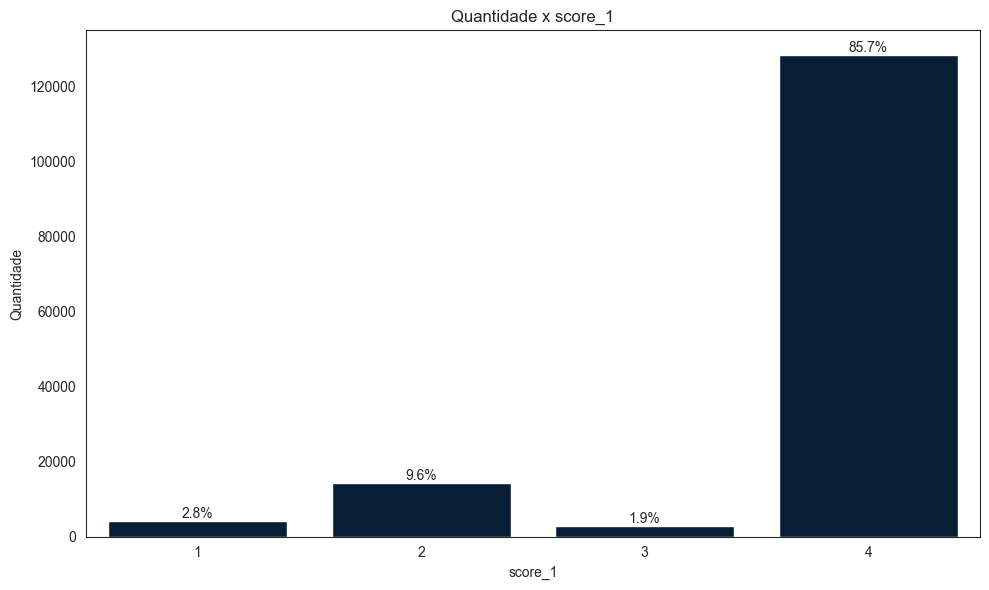

In [21]:
countplot_bar(df, 'score_1')

Nota-se que a maioria dos usuarios estão presentes na categoria 4.

In [22]:
# Definindo a função que cria o gráfico de barras
def barplot_fraude(df, feature):
    # Agrupando os dados do DataFrame df pela coluna 'feature' e 'fraude'
    feature_fraude = df.groupby([feature,'fraude']).size().unstack()
    
    # O método plot é chamado para criar um gráfico de barras
    feature_fraude.plot(kind='bar', color = ['#4169E1', '#FF4500'], figsize=(10, 6))
    plt.title('Fraude por ' + feature)
    plt.ylabel('Clientes')
    plt.xlabel(feature)
    plt.show()
    return feature_fraude

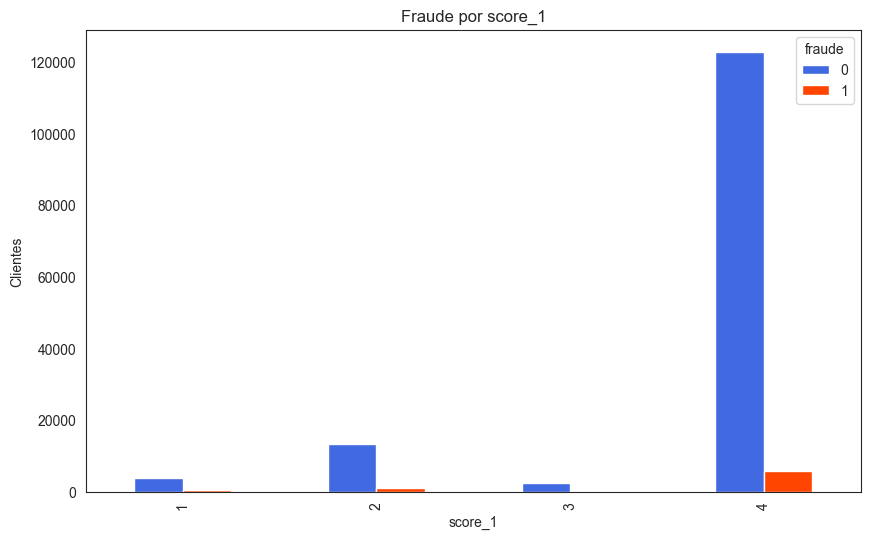

fraude,0,1
score_1,,
1,3800,395
2,13260,1118
3,2590,258
4,122850,5729


In [23]:
barplot_fraude(df, 'score_1')

A partir dos resultados, podemos tirar algumas conclusões sobre a fraude e o score_1 por categoria:

* A categoria 4 tem o maior número de clientes, tanto fraudadores quanto reais, com 122850 e 5729, respectivamente. Isso significa que essa categoria representa 88,5% dos clientes reais e 82,8% dos clientes fraudadores.
* A categoria 2 tem o segundo maior número de clientes, com 13260 reais e 1118 fraudadores. Essa categoria representa 9,6% dos clientes reais e 16,2% dos clientes fraudadores.
* A categoria 1 tem o menor número de clientes, com apenas 3800 reais e 395 fraudadores. Essa categoria representa 2,7% dos clientes reais e 0,6% dos clientes fraudadores.
* A categoria 3 tem um número muito baixo de clientes, com 2590 reais e 258 fraudadores. Essa categoria representa 1,9% dos clientes reais e 0,4% dos clientes fraudadores.

Podemos observar que a categoria 4 é a mais propensa a ter clientes fraudadores, seguida pela categoria 2. As categorias 1 e 3 são as menos propensas a ter clientes fraudadores.

Também podemos calcular a taxa de fraude por categoria, que é a porcentagem de clientes fraudadores em relação ao total de clientes da categoria. A taxa de fraude por categoria é a seguinte:

* Categoria 1: 9,4%
* Categoria 2: 7,8%
* Categoria 3: 9,1%
* Categoria 4: 4,5%

Podemos ver que a categoria 4, apesar de ter o maior número absoluto de clientes fraudadores, tem a menor taxa de fraude por categoria. Isso significa que essa categoria tem uma proporção menor de clientes fraudadores em relação aos clientes reais. Por outro lado, a categoria 1 tem a maior taxa de fraude por categoria, o que significa que essa categoria tem uma proporção maior de clientes fraudadores em relação aos clientes reais.

#### Score 2 a 10

In [24]:
def plot_histograms(data, columns):
    fig, axes = plt.subplots(3, 3, figsize=(15, 10)) # Cria uma grade de 3x3 para os histogramas
    axes = axes.ravel() # Transforma a matriz de eixos em um vetor para facilitar o acesso

    for i, col in enumerate(columns):
        axes[i].hist(data[col], bins=20, color='blue', alpha=0.7)
        axes[i].set_title(f'Histograma de {col}')
        axes[i].set_xlabel('Valor')
        axes[i].set_ylabel('Frequência')

    plt.tight_layout() # Ajusta o layout para evitar sobreposição
    plt.show()

In [25]:
def plot_boxplots(data, columns):
    fig, axes = plt.subplots(3, 3, figsize=(15, 10)) # Cria uma grade de 3x3 para os boxplots
    axes = axes.ravel() # Transforma a matriz de eixos em um vetor para facilitar o acesso

    for i, col in enumerate(columns):
        axes[i].boxplot(data[col], patch_artist = True,
        notch = True, vert = False) # Personaliza o boxplot
        axes[i].set_title(f'Boxplot de {col}')
        axes[i].set_xlabel('Coluna')
        axes[i].set_ylabel('Valor')

    plt.tight_layout() # Ajusta o layout para evitar sobreposição
    plt.show()

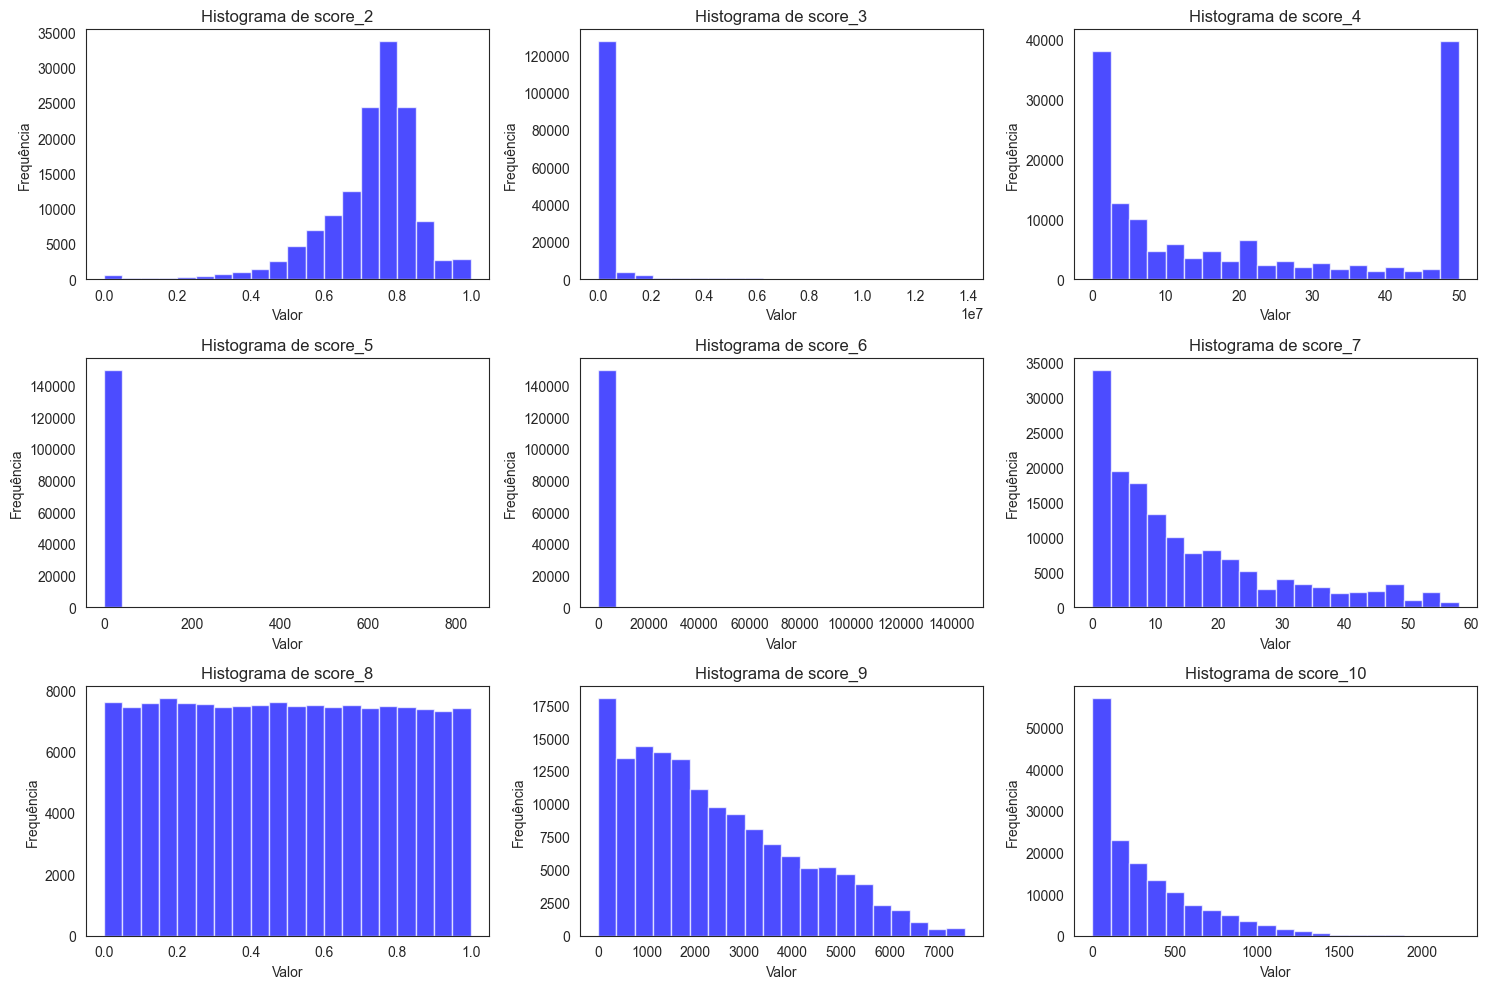

In [26]:
columns = ['score_2', 'score_3', 'score_4', 'score_5', 
           'score_6', 'score_7', 'score_8', 'score_9', 
           'score_10']
plot_histograms(df, columns)

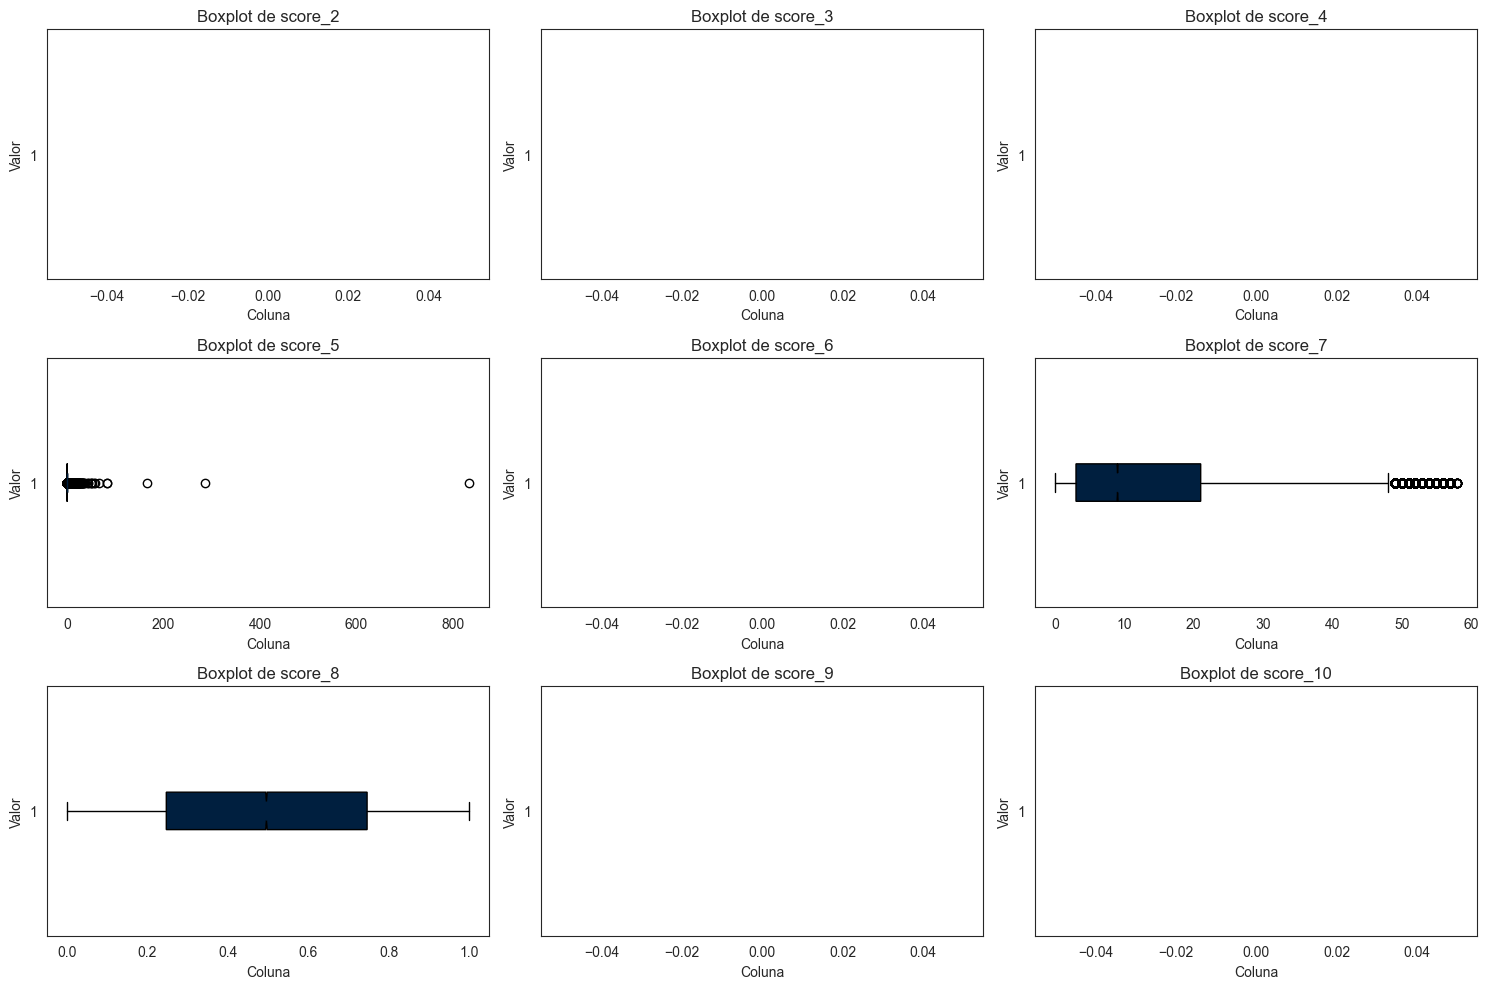

In [27]:
columns = ['score_2', 'score_3', 'score_4', 'score_5', 
           'score_6', 'score_7', 'score_8', 'score_9', 
           'score_10']
plot_boxplots(df, columns)

Pode-se perceber que:
* O histograma Score_2, apresenta uma assimetria a esqueda com o pico em torno de 0.8, ou seja, a grande parte dos clientes com alto score.
* O histograma Score_4, apresenta 2 picos um em torno de 0 e outro de 50.
* Os histogramas dos Scores 7, 9, 10, ao contrario do Score_2 tem uma simetria a direita, ou seja, grande parte dos clientes com score baixo.
* O histograma Score_8 segue uma distribuição uniforme, logo, a probabilidade de um cliente ter qualquer pontuação no intervalo definido é constante.
* Os histogramas Scores 3, 5, 6 devem ser analisádos mais a fundo.
* Podemos notar que nos BoxPlot dos Scores 5 e 7, temos alguns outliers.

##### Score_2

In [28]:
# Definir a função que cria o histograma
def criar_histograma(df, coluna_score, coluna_fraude):
  # Separar os dados em dois grupos: fraudes e reais
  fraudes = df[df[coluna_fraude] == 1]
  reais = df[df[coluna_fraude] == 0]

  # Criar uma figura com dois subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

  # Plotar o histograma dos scores dos clientes reais no segundo subplot
  ax2.hist(reais[coluna_score], bins=20, color='#4169E1')
  ax2.set_title('Clientes reais')
  ax2.set_xlabel('Score')
  ax2.set_ylabel('Frequência')

  # Plotar o histograma dos scores dos clientes fraudulentos no primeiro subplot
  ax1.hist(fraudes[coluna_score], bins=20, color='#FF4500')
  ax1.set_title('Clientes fraudulentos')
  ax1.set_xlabel('Score')
  ax1.set_ylabel('Frequência')

  # Mostrar a figura
  plt.show()

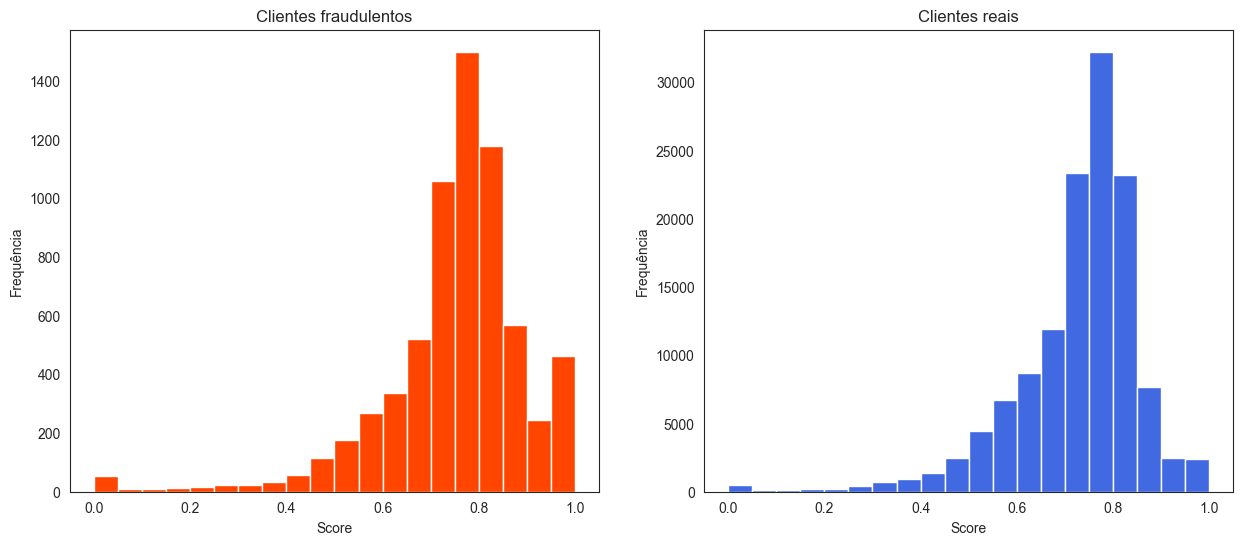

In [29]:
criar_histograma(df, 'score_2', 'fraude')

Pode-se notar que clientes com score_2 maiores, tendem a ter mais quantidade de casos de fraudadores.

#### Score_3

Para reduzir a assimetria dos dados e aproximá-los de uma distribuição normal, aplicaremos a transformação logarítmica no score_3. Assim, poderemos modelar melhor o comportamento dos dados, que podem representar o crescimento ou o decaimento dessa feature.

In [30]:
# Definir a função que cria o histograma
def criar_histograma_log(df, coluna_score, coluna_fraude):
  # Separar os dados em dois grupos: fraudes e reais
  fraudes = df[df[coluna_fraude] == 1]
  reais = df[df[coluna_fraude] == 0]

  # Aplicar a transformação logarítmica aos valores de score dos clientes reais
  log_reais = np.log(reais[coluna_score])

  # Aplicar a transformação logarítmica aos valores de score dos clientes fraudulentos
  log_fraudes = np.log(fraudes[coluna_score])

  # Criar uma figura com dois subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

  # Plotar o histograma dos scores transformados em log dos clientes reais no primeiro subplot
  ax1.hist(log_reais, bins=20, color='#4169E1')
  ax1.set_title('Clientes reais (log)')
  ax1.set_xlabel('Score (log)')
  ax1.set_ylabel('Frequência')

  # Plotar o histograma dos scores transformados em log dos clientes fraudulentos no segundo subplot
  ax2.hist(log_fraudes, bins=20, color='#FF4500')
  ax2.set_title('Clientes fraudulentos (log)')
  ax2.set_xlabel('Score (log)')
  ax2.set_ylabel('Frequência')

# Mostrar a figura
plt.show()


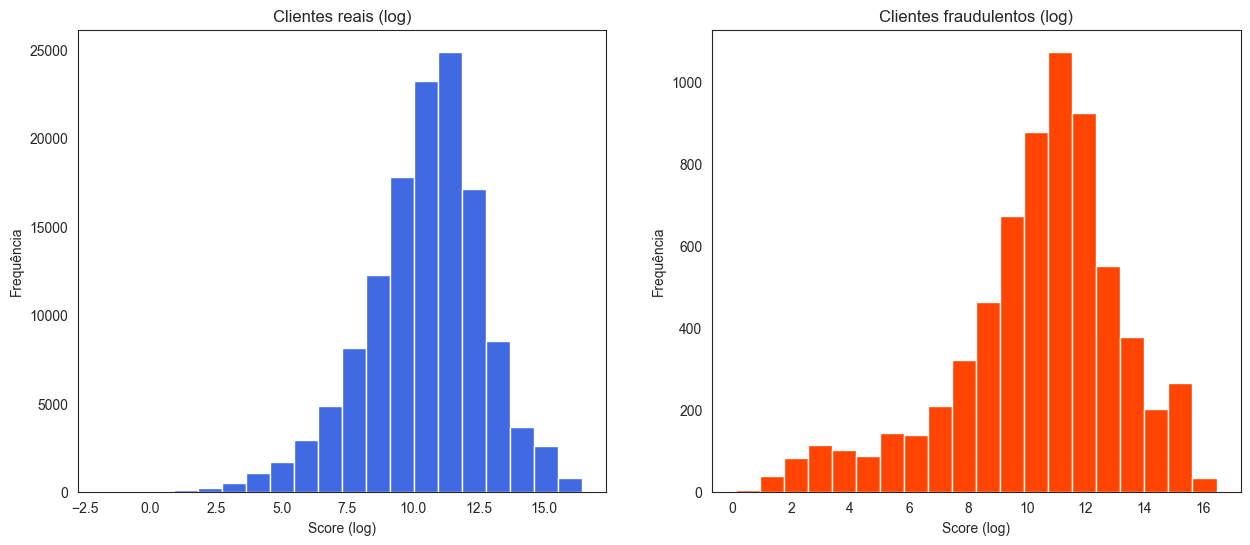

In [31]:
criar_histograma_log(df, 'score_3', 'fraude')

Podemos notar que em relação so score_3, os fraudadores estão mais presentes nos clientes com scores baixos e altos, clientes com scores intermediarios tendem a não serem fraudadores.

#### Score_4

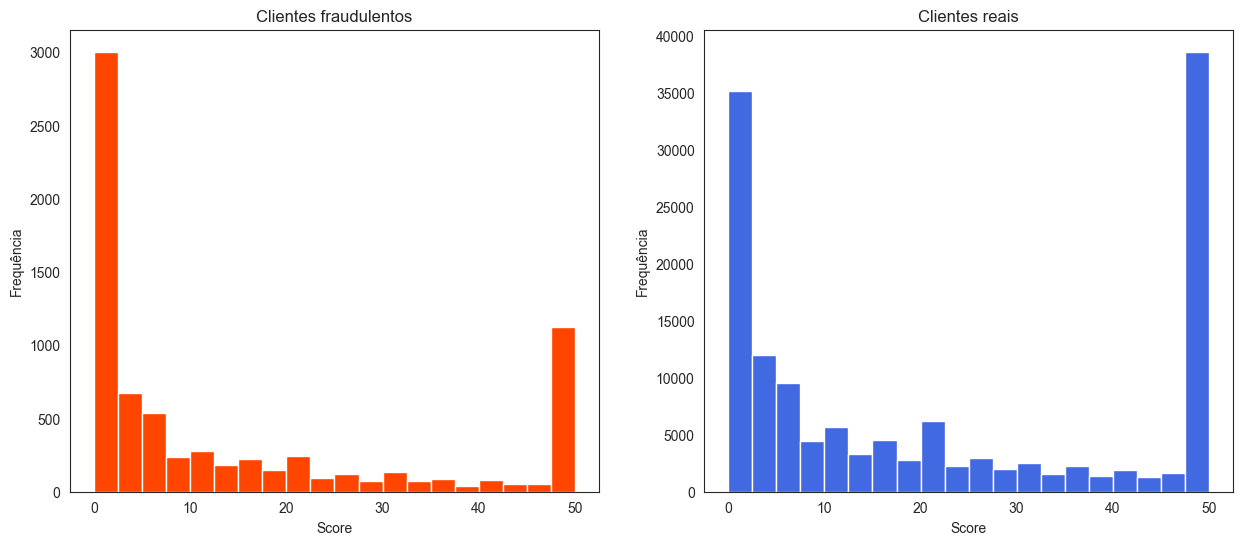

In [32]:
criar_histograma(df, 'score_4', 'fraude')

É possivel perceber que em relação ao score_4, quanto maior a pontuação menor é a chance de o cliente ser um fraudador e quanto menor o score maior as chances.

#### Score_5

In [33]:
# Definir a função que cria o histograma
def criar_histograma_lim(df, coluna_score, coluna_fraude, limite):
  # Separar os dados em dois grupos: fraudes e reais
  fraudes = df[df[coluna_fraude] == 1]
  reais = df[df[coluna_fraude] == 0]

  # Filtrar os dados dos clientes reais usando o limite
  reais_filtrados = reais.query(f'{coluna_score} <= {limite}')

  # Filtrar os dados dos clientes fraudulentos usando o limite
  fraudes_filtrados = fraudes.query(f'{coluna_score} <= {limite}')

  # Criar uma figura com dois subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

  # Plotar o histograma dos scores dos clientes reais filtrados no segundo subplot
  ax1.hist(reais_filtrados[coluna_score], bins=20, color='#4169E1')
  ax1.set_title('Clientes reais')
  ax1.set_xlabel('Score')
  ax1.set_ylabel('Frequência')

  # Plotar o histograma dos scores dos clientes fraudulentos filtrados no primeiro subplot
  ax2.hist(fraudes_filtrados[coluna_score], bins=20, color='#FF4500')
  ax2.set_title('Clientes fraudulentos')
  ax2.set_xlabel('Score')
  ax2.set_ylabel('Frequência')

# Mostrar a figura
plt.show()


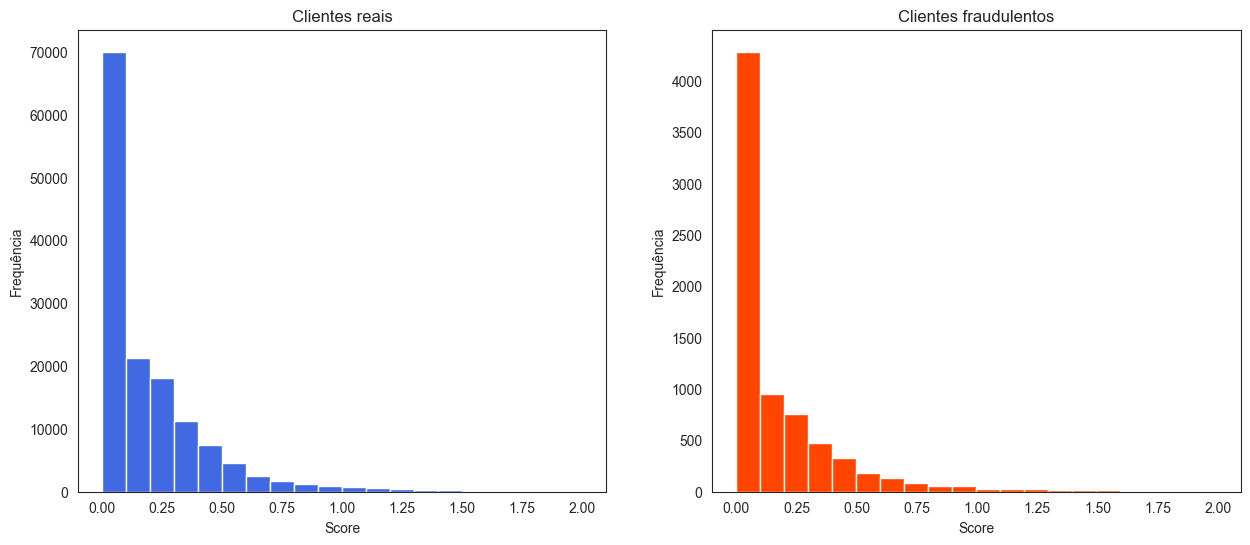

In [34]:
criar_histograma_lim(df, 'score_5', 'fraude', 2)

Podemos notar que não existe uma correlação entre o score_5 e os fraudadores.

In [35]:
df[df['score_5'] > 100]

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,data_compra,valor_compra,score_fraude_modelo,fraude
4085,3,0.8631,4006.82,23.0,165.666667,9.0,BR,2,Rolo De Fita Twing,cat_9ad7db1,0.548213,228.0,227.0,1,NaN,Y,2020-04-11 17:28:19,5.66,80,0
52904,3,0.6686,4336.99,20.0,285.085714,618.0,BR,54,Dvd Pink Floyd Special Editon (box Original La...,cat_12a8b9b,0.937734,4044.0,161.0,1,Y,Y,2020-03-24 8:30:33,1.27,57,0
101854,3,0.2882,284.81,20.0,833.333333,3444.0,BR,3,Suporte Dish,cat_7fee0bd,0.367166,2953.0,219.0,1,N,Y,2020-04-13 22:15:25,1.13,48,0


Podemos notar também que os outliers com score_5 muito elevados não são fraudadores.

#### Score_6

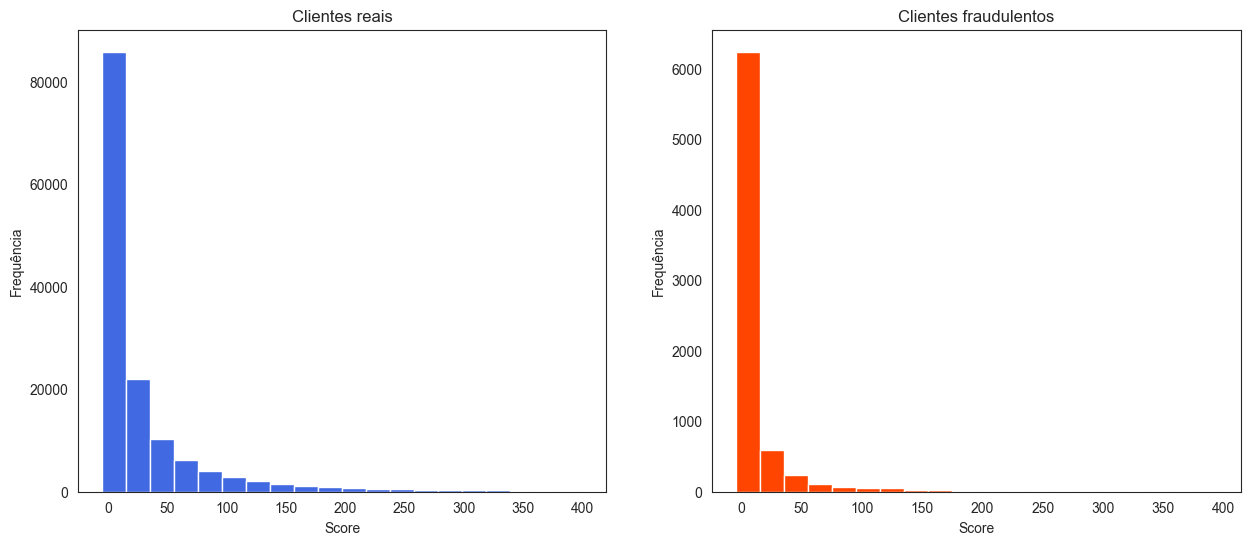

In [36]:
criar_histograma_lim(df, 'score_6', 'fraude', 400)

Da mesma forma do score_5, não temos evidencias para conectar os clientes fraudadores com o score_6 dos clientes.

In [37]:
df[df['score_6']>20000]

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,data_compra,valor_compra,score_fraude_modelo,fraude
1817,4,NaN,NaN,20.0,0.000000,22157.0,BR,24,75 Caixas De Papelão Mercado Envios M 406x300x250,cat_83010f0,0.596682,6207.0,364.0,1,NaN,Y,2020-03-12 10:02:30,69.60,48,0
2568,4,0.4423,85177.94,50.0,0.193367,37941.0,BR,48,Caixa Papelão Embalagem Correio Sedex 16 X 11 ...,cat_2d99b60,0.023614,3892.0,1419.0,1,NaN,Y,2020-04-04 18:53:31,31.27,24,0
4669,4,0.5814,81218.25,8.0,0.375992,33516.0,BR,12,02 X Ci Smd Slc2013m - Slc2013 M1 Sop26 Origi...,cat_e1bb586,0.247956,4948.0,18.0,1,NaN,N,2020-03-17 13:12:22,6.12,64,0
6532,4,0.2671,615536.05,20.0,0.000000,33275.0,BR,17,18 Rolos De Fita Adesiva Transp. Mercado Livre...,cat_edab4fd,0.582823,5066.0,377.0,1,NaN,Y,2020-04-20 15:32:12,33.08,52,0
10377,4,0.9051,299081.46,14.0,0.559748,75535.0,BR,6,Cabide Magica 9 Furos Multi-dobrável Organizador,cat_876251f,0.727569,4853.0,351.0,1,NaN,Y,2020-03-26 14:14:56,3.11,52,0
16523,4,0.8606,159010.98,50.0,0.000000,28080.0,BR,7,Quebra Cabeça Puzzle Volta Ao Mundo 2000 Peças...,cat_51aa327,0.417971,5989.0,403.0,1,NaN,Y,2020-04-05 16:02:53,19.01,32,0
29029,4,0.7842,801.11,43.0,0.000000,28963.0,BR,0,Vidro Coquinho 200ml 100 Unidades P/ Lembrança...,cat_2d99b60,0.275123,4926.0,390.0,1,NaN,Y,2020-04-21 13:02:59,29.12,65,0
29086,4,0.2710,640337.86,20.0,0.000000,23395.0,BR,15,350 Envelopes Plásticos Segurança Mercado Livr...,cat_635403a,0.309670,2973.0,238.0,1,NaN,Y,2020-04-10 12:02:25,27.35,64,0
44375,2,0.3002,13666.15,4.0,0.000000,38350.0,AR,4,Aceite De Hipericon Hierbas De San Juan 15ml C...,cat_4a89dd2,0.352080,3386.0,315.0,1,NaN,N,2020-03-11 11:33:39,1.04,93,0
47514,4,NaN,NaN,32.0,0.210308,32614.0,AR,1,Chupete Bibs X1 Varios Colores Caucho Bpa Free...,cat_bd0382c,0.202393,3475.0,341.0,1,NaN,Y,2020-03-09 18:37:13,10.42,33,0


Também nãoi temos nenhuma correlação entre os outliers (clientes com scores muito alto) com os fraudadores.

#### Score_7

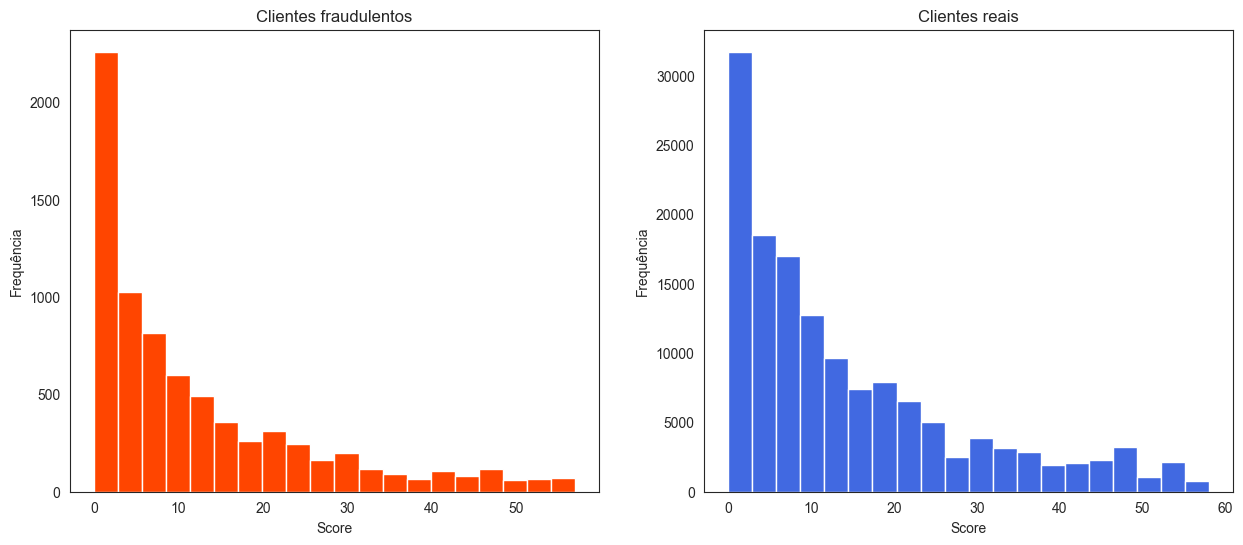

In [38]:
criar_histograma(df, 'score_7', 'fraude')

O que podemos tirar de insight dos gráficos é que os clientes fraudulentos se concentram mais em scores baixos.

#### Score_8

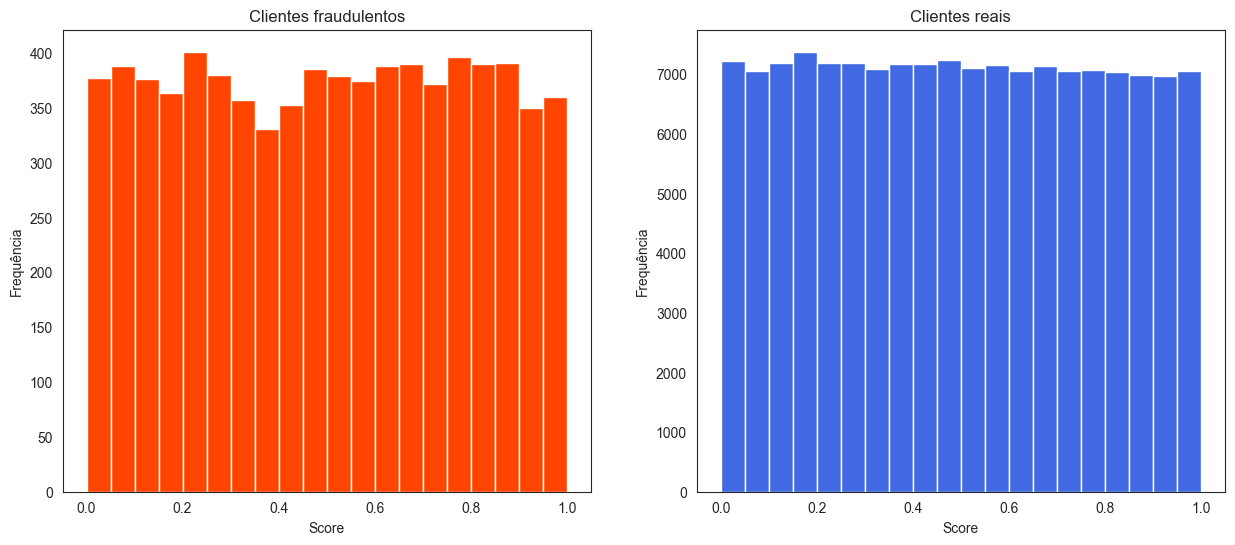

In [39]:
criar_histograma(df, 'score_8', 'fraude')

Score 8 segue uma dstribuição uniforme, tanto clientes reais como os fraudulentos segue o mesmo padrão.

#### Score_9

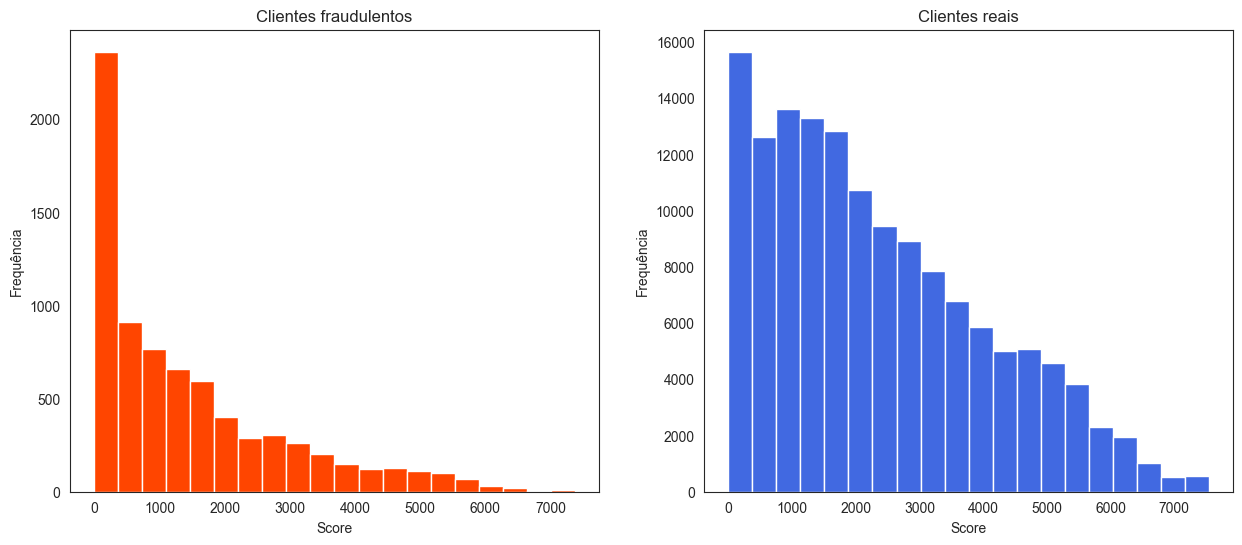

In [40]:
criar_histograma(df, 'score_9', 'fraude')

Percebe-se uma diferença entre os clientes fraudulentos dos reais, os reais estão mais bem distribuidos de acordo com os scores, já os fraudulentos se concentram muito mais nos scores baixos.

#### Score_10

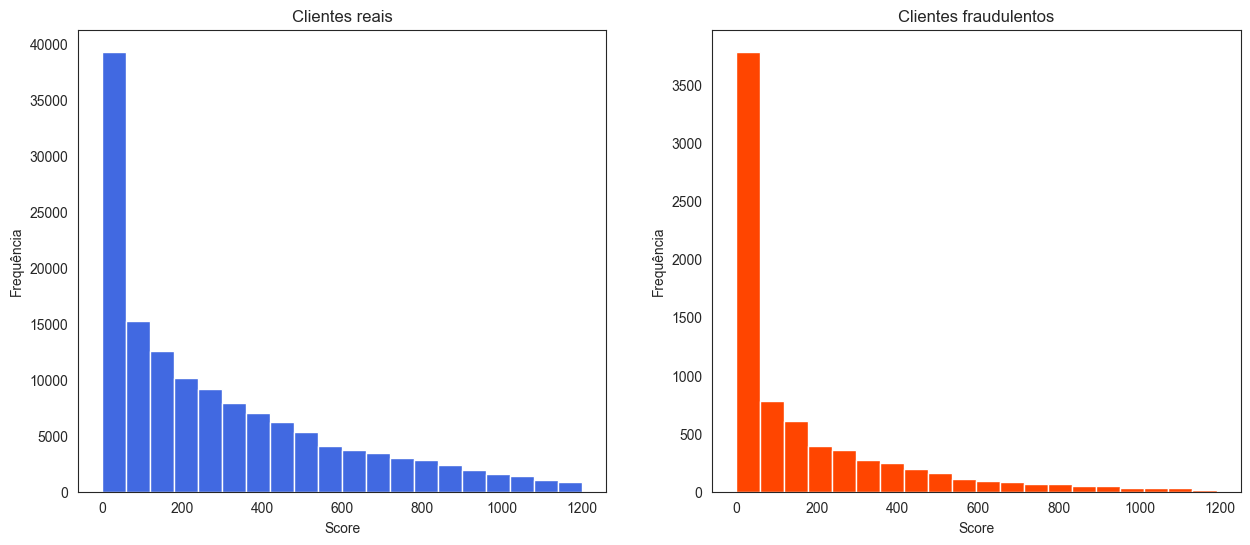

In [41]:
criar_histograma_lim(df, 'score_10', 'fraude', 1200)

De forma semelhante ao score_9, os clientes fraudulentos se concentram mais em pontuações mais baixas.

### Entrega_doc

#### Entrega_doc_1

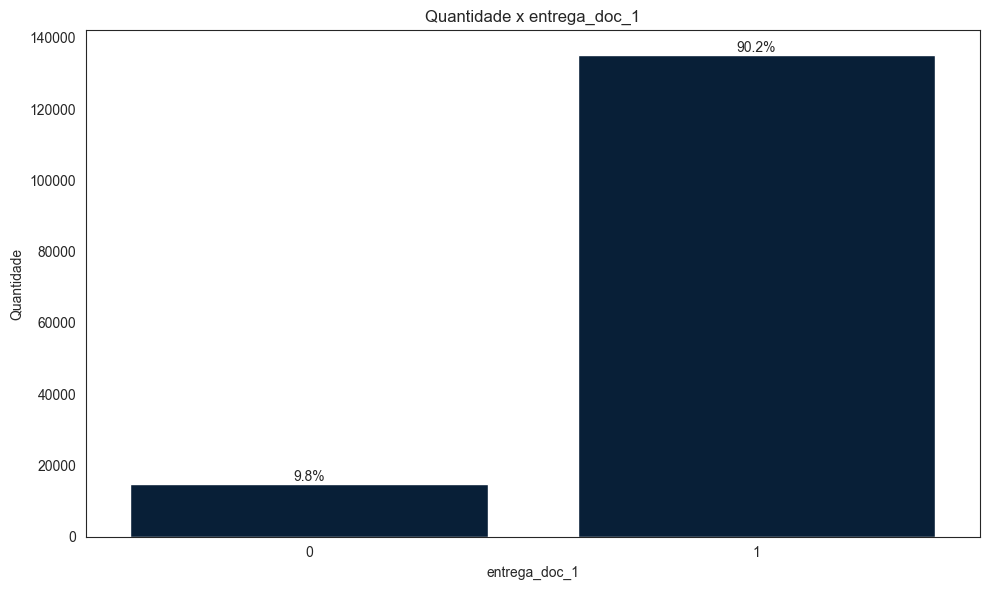

In [42]:
countplot_bar(df, 'entrega_doc_1')

Aqui podemos encontrar um desbalanceamento onde mais de 90% dos clientes fizeram a entrega do documento 1.

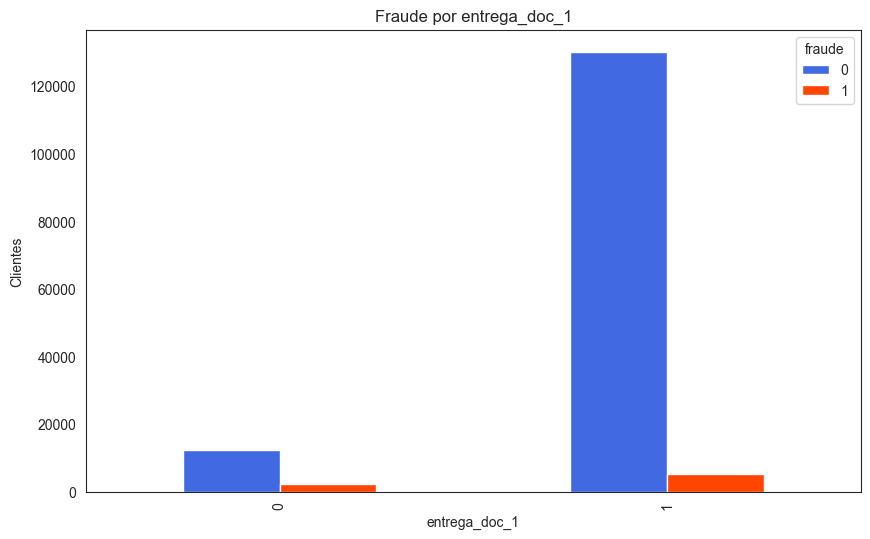

fraude,0,1
entrega_doc_1,,
0,12287,2360
1,130213,5140


In [43]:
barplot_fraude(df, 'entrega_doc_1')

Algumas conclusões:

* A maioria dos clientes (90,6%) entregou o documento 1, independentemente de serem fraudadores ou reais.
* A proporção de fraudadores entre os clientes que entregaram o documento 1 é de 3,8%, enquanto que entre os clientes que não entregaram o documento 1 é de 16,1%. Isso sugere que a entrega do documento 1 está associada a uma menor probabilidade de fraude.
* O número absoluto de fraudadores que entregaram o documento 1 é maior do que o número de fraudadores que não entregaram o documento 1 (5140 contra 2360). Isso indica que a entrega do documento 1 não é suficiente para evitar a fraude, e que outros fatores devem ser considerados.

#### Entrega_doc_2

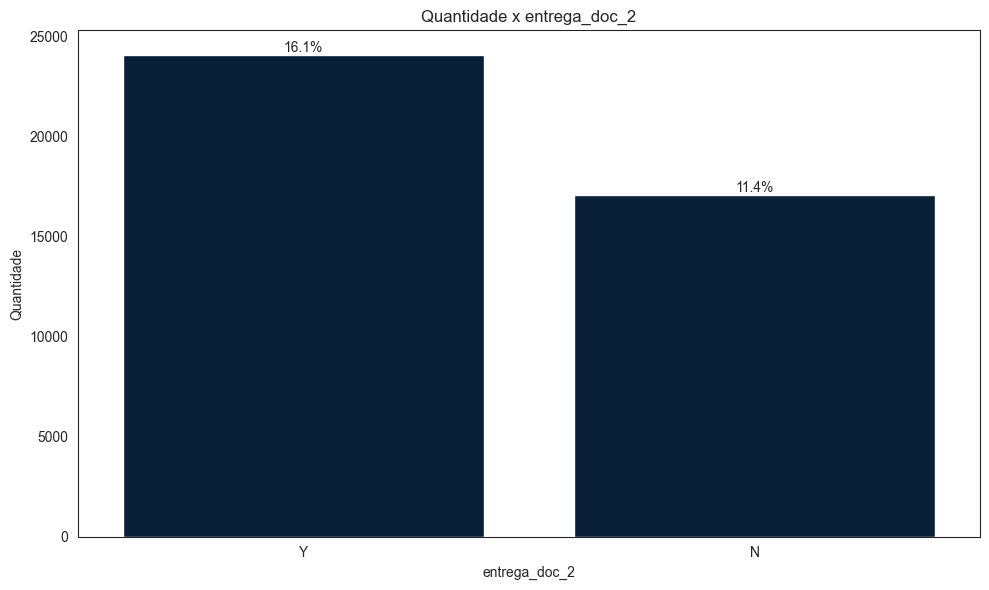

In [44]:
countplot_bar(df, 'entrega_doc_2')

A feature entrega_doc_2 tem mais de 70% dos seus valores vazios. Isso pode indicar que esses clientes não entregaram o documento 2. Assim, conclui-se que mais de 80% dos clientes não fizeram essa entrega.

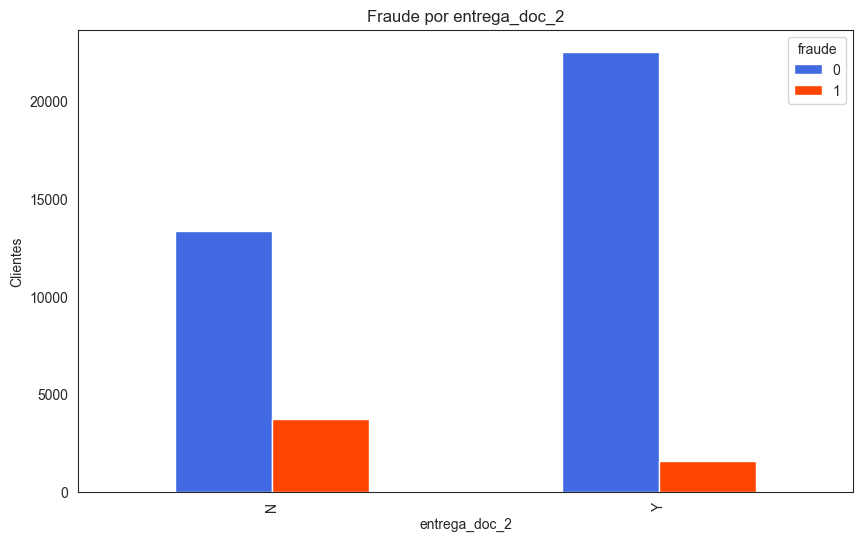

fraude,0,1
entrega_doc_2,,
N,13343,3709
Y,22537,1554


In [45]:
barplot_fraude(df, 'entrega_doc_2')

Algumas conclusões:

* A maioria dos clientes (+80%) não entregou o documento 2, independentemente de serem fraudadores ou reais.
* A proporção de fraudadores entre os clientes que não entregaram o documento 2 é de 21,7%, enquanto que entre os clientes que entregaram o documento 2 é de 6,4%. Isso sugere que a entrega do documento 2 está associada a uma menor probabilidade de fraude.
* O número absoluto de fraudadores que não entregaram o documento 2 é maior do que o número de fraudadores que entregaram o documento 2 (3709 contra 1554). Isso indica que a entrega do documento 2 não é suficiente para evitar a fraude, e que outros fatores devem ser considerados.

#### Entrega_doc_3

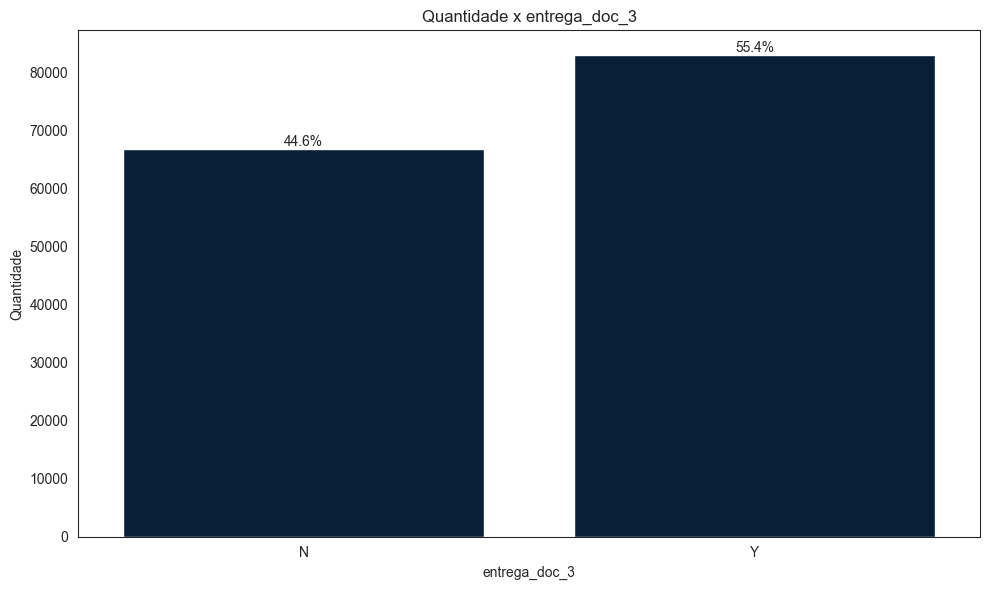

In [46]:
countplot_bar(df, 'entrega_doc_3')

Em relação a feature entrega_doc_3, temos uma feature mais balanceada, onde mais de 50% dos clientes fizeram a entrega dos documentos necessários.

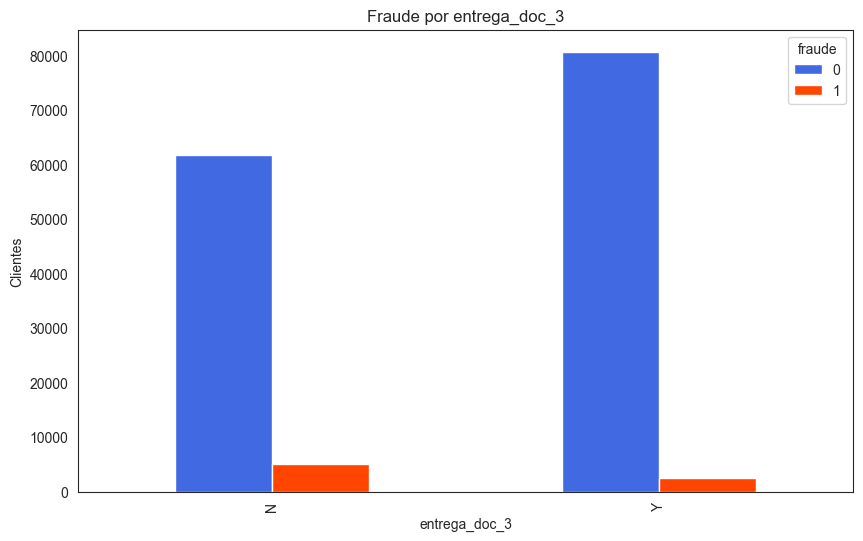

fraude,0,1
entrega_doc_3,,
N,61792,5079
Y,80708,2421


In [47]:
barplot_fraude(df, 'entrega_doc_3')

Algumas conclusões:

* A maioria dos clientes (56,7%) entregou o documento 3, independentemente de serem fraudadores ou reais.
* A proporção de fraudadores entre os clientes que entregaram o documento 3 é de 2,9%, enquanto que entre os clientes que não entregaram o documento 3 é de 7,6%. Isso sugere que a entrega do documento 3 está associada a uma menor probabilidade de fraude.
* O número absoluto de fraudadores que entregaram o documento 3 é menor do que o número de fraudadores que não entregaram o documento 3 (2421 contra 5079). Isso indica que a entrega do documento 3 é um fator importante para evitar a fraude, mas que outros fatores também devem ser considerados.

### categoria_produto

In [149]:
df['categoria_produto'].head()

0    cat_8d714cd
1    cat_64b574b
2    cat_e9110c5
3    cat_d06e653
4    cat_6c4cfdc
Name: categoria_produto, dtype: object

In [150]:
df['categoria_produto'].nunique()

8324

In [151]:
df['categoria_produto'].value_counts()

categoria_produto
cat_43b9c10    2331
cat_d69bed9    1799
cat_604df77    1784
cat_6c4cfdc    1449
cat_4249bd8    1191
               ... 
cat_0d1c81b       1
cat_4fc8b8b       1
cat_9ba475f       1
cat_75e1eaf       1
cat_45b507c       1
Name: count, Length: 8324, dtype: int64

Uma Feature que temos tem muitos valores distintos, como os mais de 8 mil categorias mencionados, então é importante pensar em maneiras de tratá-la antes de usá-la em um modelo de Machine Learning. Algumas opções incluem:

* Frequency Encoding: é uma abordagem que substitui cada valor na coluna pelo seu respectivo percentual de ocorrência. Essa técnica pode ajudar o modelo a determinar an importância relativa de cada categoria de acordo com sua frequência de ocorrência.

* Target Encoding: uma abordagem que substitui o valor médio do alvo específico para cada categoria. Essa técnica pode ajudar o modelo a identificar as tendências e padrões particulares de cada categoria. Para evitar problemas de overfitting, o uso de métodos de regularização como o suavização é crucial.

Testaremos as duas, e a que tiver o melhor resultado será selecionada.

### Horas do Dia

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   score_1              150000 non-null  int64  
 1   score_2              137016 non-null  float64
 2   score_3              137016 non-null  float64
 3   score_4              149635 non-null  float64
 4   score_5              150000 non-null  float64
 5   score_6              149989 non-null  float64
 6   pais                 149806 non-null  object 
 7   score_7              150000 non-null  int64  
 8   produto              150000 non-null  object 
 9   categoria_produto    150000 non-null  object 
 10  score_8              150000 non-null  float64
 11  score_9              149989 non-null  float64
 12  score_10             149635 non-null  float64
 13  entrega_doc_1        150000 non-null  int64  
 14  entrega_doc_2        41143 non-null   object 
 15  entrega_doc_3    

In [49]:
df['data_compra'] = pd.to_datetime(df['data_compra'])

In [50]:
# Criando uma nova feature com a hora da compra
df['hora'] = df['data_compra'].dt.hour

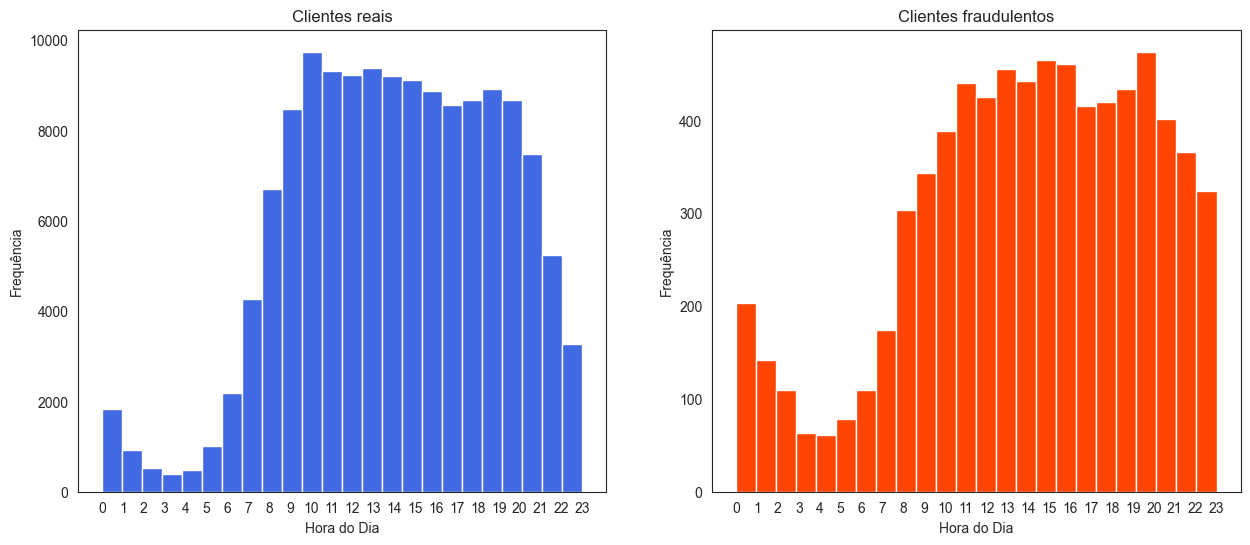

In [51]:
# Criando uma nova feature com a hora da compra
df['hora'] = df['data_compra'].dt.hour

# dataframe com apenas as compras fraudulentas
df_fraude = df[df['fraude'] == 1] 
# dataframe com apenas as compras reais
df_real = df[df['fraude'] == 0]

# Criar uma figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plotar o histograma dos scores dos clientes reais filtrados no segundo subplot
ax1.hist(df_real['hora'], bins=24, color='#4169E1')
ax1.set_title('Clientes reais')
ax1.set_xlabel('Hora do Dia')
ax1.set_ylabel('Frequência')
ax1.set_xticks(np.arange(0, 24))

# Plotar o histograma dos scores dos clientes fraudulentos filtrados no primeiro subplot
ax2.hist(df_fraude['hora'], bins=24, color='#FF4500')
ax2.set_title('Clientes fraudulentos')
ax2.set_xlabel('Hora do Dia')
ax2.set_ylabel('Frequência')
ax2.set_xticks(np.arange(0, 24));

Podemos observar que a maioria das compras é realizada no período entre as 8h e as 20h, porém há uma taxa maior de compras fraudulentas em relação às compras reais nos horários entre as 22h e as 5h, quando as compras reais voltam a superar as fraudulentas. Esse padrão pode indicar que os fraudadores aproveitam os momentos de menor movimento para tentar passar despercebidos.

### Dia do mês

In [52]:
# Criando uma nova feature com o dia da compra
df['dia'] = df['data_compra'].dt.day

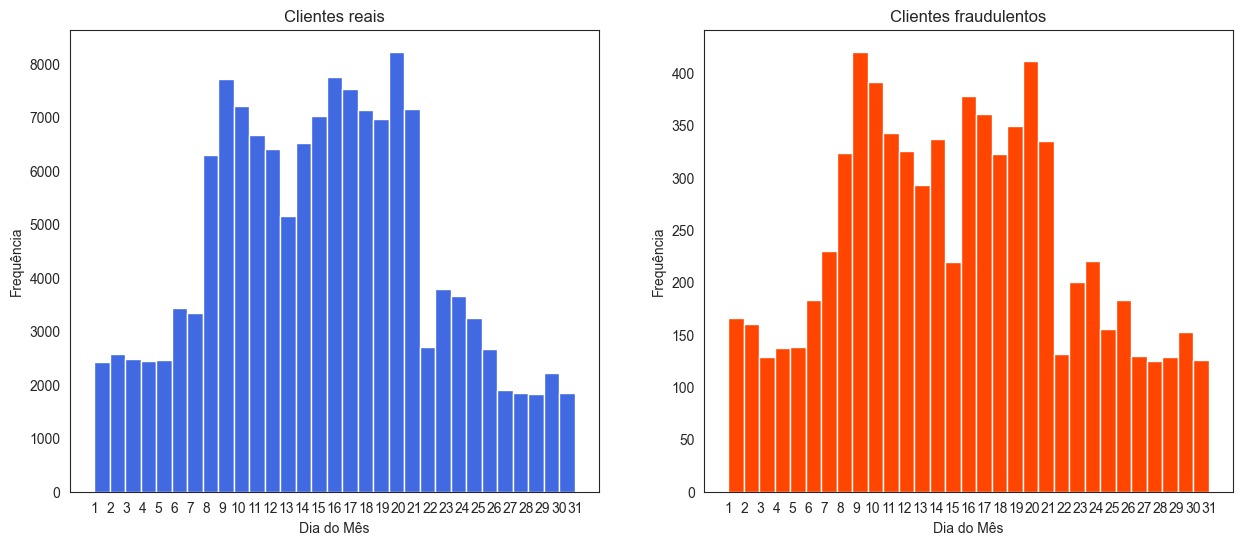

In [53]:
# dataframe com apenas as compras fraudulentas
df_fraude = df[df['fraude'] == 1] 
# dataframe com apenas as compras reais
df_real = df[df['fraude'] == 0]

# Criar uma figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plotar o histograma dos scores dos clientes reais filtrados no segundo subplot
ax1.hist(df_real['dia'], bins=31, color='#4169E1')
ax1.set_title('Clientes reais')
ax1.set_xlabel('Dia do Mês')
ax1.set_ylabel('Frequência')
ax1.set_xticks(np.arange(1, 32))

# Plotar o histograma dos scores dos clientes fraudulentos filtrados no primeiro subplot
ax2.hist(df_fraude['dia'], bins=31, color='#FF4500')
ax2.set_title('Clientes fraudulentos')
ax2.set_xlabel('Dia do Mês')
ax2.set_ylabel('Frequência')
ax2.set_xticks(np.arange(1, 32));

Podemos observar que as compras ocorrem com mais frequência entre os dias 8 e 20, mas não há uma relação evidente entre as compras fraudulentas e os dias do mês. Talvez seja necessário analisar outras variáveis, como o valor da compra, o tipo de produto ou o método de pagamento, para identificar padrões de fraude.

### Valor da compra

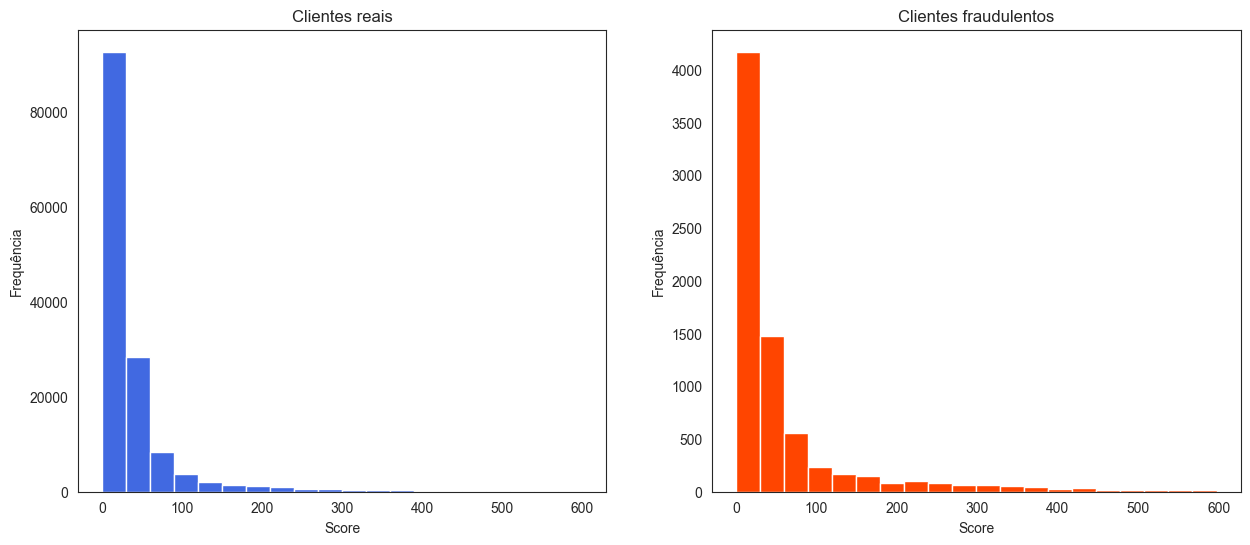

In [54]:
criar_histograma_lim(df, 'valor_compra', 'fraude', 600)

In [55]:
df[df['valor_compra']>1600]

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,...,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,data_compra,valor_compra,score_fraude_modelo,fraude,hora,dia
724,4,0.7614,424412.02,39.0,0.000000,100.0,AR,40,Guitarra Gibson Les Paul 2018 Tribute Faded Ho...,cat_fd1336f,...,335.0,1,NaN,Y,2020-04-19 12:48:38,2366.83,73,0,12,19
5457,3,0.9590,1389442.32,3.0,0.000000,87.0,AR,3,Sommier Simmons Recharge Supreme King 200x200c...,cat_dd47b78,...,29.0,1,NaN,N,2020-03-13 19:40:14,1706.69,3,0,19,13
9101,2,0.8866,2494.31,48.0,0.000000,5.0,BR,4,Disjuntor Schneider Nw20 H1 Extraível Motoriza...,cat_d9753d4,...,417.0,1,NaN,Y,2020-04-16 15:53:24,2647.58,91,0,15,16
12640,4,0.7685,85730.93,1.0,0.013116,16.0,BR,2,Drone Dji Phantom 4 Pro V2,cat_22e82a7,...,0.0,1,NaN,N,2020-04-10 03:39:16,2706.46,86,1,3,10
13533,2,NaN,NaN,12.0,0.000000,261.0,BR,0,17 Jogos De Mesa D- 1.20 C/ 6 Cadeiras De Ferr...,cat_df7271d,...,147.0,1,NaN,Y,2020-03-13 08:15:02,1799.08,19,0,8,13
18819,2,0.8113,1193.29,3.0,0.000000,20.0,AR,21,Notebook Lenovo V330 Core I3-6006u 4gb 1tb Led 15,cat_e5ca240,...,629.0,1,Y,Y,2020-03-26 10:02:14,1681.67,76,1,10,26
22038,2,0.6346,243110.61,35.0,0.000000,125.0,AR,3,Perfil Doble T Del 18 Ipn 180 Barra 12 Mt Gram...,cat_96e3bca,...,233.0,1,NaN,Y,2020-03-09 08:54:49,3696.35,65,0,8,9
22710,2,0.8601,59594.18,9.0,0.000000,4.0,BR,2,Anúncio Interno,cat_d9753d4,...,33.0,1,NaN,N,2020-03-28 12:08:34,1876.49,84,0,12,28
23060,4,0.7506,40112.58,8.0,0.000000,868.0,BR,0,Kit 10 Onu Huawei Gpon Wi-fi Hg8546m,cat_aa8f33e,...,54.0,1,NaN,N,2020-04-21 17:31:34,1639.00,86,0,17,21
28518,2,NaN,NaN,50.0,0.000000,14.0,BR,0,Kit C/ 2 Hp Dl380 G7 2 Quad Core 2.40ghz 2 Hd ...,cat_02711c1,...,1161.0,1,Y,Y,2020-04-03 17:52:11,2602.28,65,0,17,3


Como podemos observar nas análises anteriores, há uma relação entre o valor da compra e as fraudes, pois as compras com valores acima de 1600 reais apresentam uma maior proporção de transações fraudulentas. Isso pode indicar que os fraudadores tentam obter o maior lucro possível com cada compra, ou que as compras de alto valor são mais difíceis de serem verificadas pelos sistemas de segurança.

### Matriz de Correlação

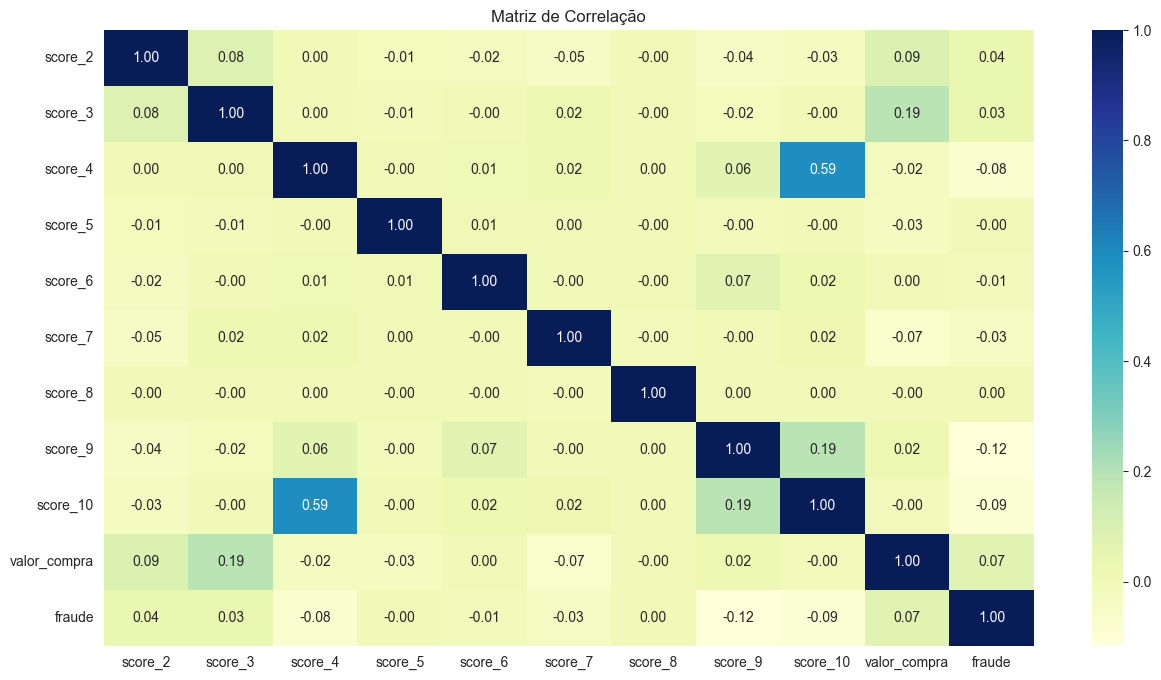

In [56]:
corr = df[['score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9', 'score_10', 'valor_compra', 'fraude']].corr()
plt.figure(figsize = (15, 8))
sns.heatmap(corr, annot = True, cmap = "YlGnBu", fmt = ".2f")
plt.title("Matriz de Correlação")
plt.show()

Para considerarmos uma correlação como forte o suficiente para justificar a remoção de uma variável, seria necessário que a correlação estivesse acima de 0.9. Como a maior correlação que temos é de 0.59, entre score_4 e score_10, não iremos remover nenhuma variável.

# Testes de Hipoteses

Aqui, iremos usar testes de hipóteses, pois são úteis para determinar se há uma relação estatisticamente significativa entre as variáveis examinadas. Ao descobrir tal relação, podemos concluir que existe uma conexão entre as variáveis examinadas e a "fraude". Isso pode nos ajudar a entender melhor o comportamento dos dados e tomar decisões informadas com base nessa conexão.

Será usado:

* Teste qui-quadrado: O teste do qui-quadrado é usado para verificar se duas variáveis categóricas são independentes. No nosso caso, queremos determinar se há uma correlação significativa entre os valores da coluna estudada e os valores da coluna de fraude. Para fazer isso, criamos uma tabela de contingência que mostra a frequência de ocorrência de cada combinação de valores das duas variáveis. Em seguida, usamos o teste do qui-quadrado para ver se a distribuição na tabela de contingência é significativamente diferente da distribuição esperada no caso de ambas as variáveis serem independentes. Podemos concluir que existe uma relação estatisticamente significativa entre as variáveis se o valor-p do teste do qui-quadrado for menor que o nível de significância pré-determinado, que geralmente é 0,05.

* Teste de Kolmogorov-Smirnov: O teste de Kolmogorov-Smirnov é usado para descobrir se uma distribuição de dados segue uma distribuição teórica específica. Nesse caso, queremos saber se a distribuição dos valores da coluna estudada corresponde an uma distribuição teórica, ou seja, a distribuição normal.
O teste de Kolmogorov-Smirnov compara a maior diferença absoluta entre as duas funções de distribuição acumulada com um valor crítico, que depende do tamanho da amostra. Se a maior diferença absoluta for maior que o valor crítico, rejeitamos a hipótese nula de que a distribuição dos dados segue a distribuição teórica.
Se o valor-p do teste de Kolmogorov-Smirnov for menor que o nível de significância pré-determinado, normalmente 0,05, podemos concluir que os dados não seguem a distribuição teórica. Isso demonstra que há uma diferença estatisticamente significativa entre a distribuição observada e a distribuição teórica.


#### Score_1

In [57]:
def teste_qui(df, col, fraude, nivel):

    ''' Essa função recebe como parâmetros dataframe df, a coluna col, a variável fraude e o nível de significância nivel. 
    O valor-p do teste do qui-quadrado, bem como uma conclusão sobre a hipótese nula, são fornecidos pela função. 
    De acordo com a hipótese nula, não há conexão entre as variáveis col e fraude. 
    O valor-p da tabela de contingência das frequências observadas das variáveis é encontrado pelo código usando a função chi2_contingency da biblioteca scipy.stats.'''
    
    # Realizar o teste do qui-quadrado
    contingencia = pd.crosstab(df[col], df[fraude])
    resultado_quiquadrado = chi2_contingency(contingencia)

    # Extrair o valor-p do resultado do teste do qui-quadrado
    valor_p_quiquadrado = resultado_quiquadrado[1]

    print("Valor-p do teste do qui-quadrado:", valor_p_quiquadrado)

    # Comparar os valores-p com um nível de significância pré-determinado (por exemplo, 0.05)
    if valor_p_quiquadrado < nivel:
        print("Há evidências estatísticas para rejeitar a hipótese nula no teste do qui-quadrado.")
    else:
        print("Não há evidências estatísticas para rejeitar a hipótese nula no teste do qui-quadrado.")

In [58]:
def teste_ks(df, col, fraude, nivel):

    ''' Essa função recebe como parâmetros o dataframe df, a coluna col, 
        a variável fraude e o nível de significância nivel. 
        Ela retorna o valor-p do teste de Kolmogorov-Smirnov e uma conclusão sobre a hipótese nula. 
        A hipótese nula é de que as duas amostras foram retiradas da mesma distribuição contínua.'''
    
    # Realizar o teste de Kolmogorov-Smirnov
    dados_fraude = df[df[fraude] == 1][col]
    dados_real = df[df[fraude] == 0][col]
    resultado_ks = ks_2samp(dados_fraude, dados_real)

    # Extrair o valor-p do resultado do teste de Kolmogorov-Smirnov
    valor_p_ks = resultado_ks[1]

    print("Valor-p do teste de Kolmogorov-Smirnov:", valor_p_ks)

    # Comparar os valores-p com um nível de significância pré-determinado (por exemplo, 0.05)
    if valor_p_ks < nivel:
        print("Há evidências estatísticas para rejeitar a hipótese nula no teste de Kolmogorov-Smirnov.")
    else:
        print("Não há evidências estatísticas para rejeitar a hipótese nula no teste de Kolmogorov-Smirnov.")


In [59]:
teste_qui(df, 'score_1', 'fraude', 0.05)

Valor-p do teste do qui-quadrado: 2.371872621590785e-126
Há evidências estatísticas para rejeitar a hipótese nula no teste do qui-quadrado.


In [60]:
teste_ks(df, 'score_1', 'fraude', 0.05)

Valor-p do teste de Kolmogorov-Smirnov: 2.627926803483881e-60
Há evidências estatísticas para rejeitar a hipótese nula no teste de Kolmogorov-Smirnov.


Valor-p do teste do qui-quadrado: 2.371872621590785e-126

* O valor-p do teste do qui-quadrado também é extremamente baixo, próximo de zero.
* Isso também indica que há evidências estatísticas muito fortes para rejeitar a hipótese nula.
Logo, pode-se concluir que há uma associação significativa entre os valores da coluna "score_1" e os valores da coluna de fraude.
* Isso sugere que a coluna "score_1" e a coluna de fraude estão relacionadas de forma significativa.

Em resumo, com base no valor-p extremamente baixo obtido no teste do qui-quadrado, podemos concluir que existe uma relação estatisticamente significativa entre a coluna "score_1" e a coluna de fraude. Essa relação sugere que as pontuações da coluna "score_1" têm um impacto significativo na determinação da ocorrência de fraude. Essas conclusões podem ser utilizadas para tomar decisões informadas e implementar medidas de prevenção ou detecção de fraudes com base nos valores da coluna "score_1".

#### score_2 a score_10

Será criado um gráfico que mostrará a distribuição das pontuações de score em relação aos casos de fraude e aos reais. Será útil para determinar se existe alguma correlação entre as pontuações de desempenho e o número de casos de fraude.

Esse gráfico mostra como as distribuições de pontuações de score se comportam tanto para transações reais quanto para transações fraudulentas. Assim, é possível determinar se há diferenças significativas nas pontuações dos dois grupos.

Ele ajudará a analisar a relação entre as pontuações de score e a ocorrência de fraude; também revelando a eficácia dos scores como indicador de fraude e ajuda na tomada de decisões relacionadas à detecção de fraude.

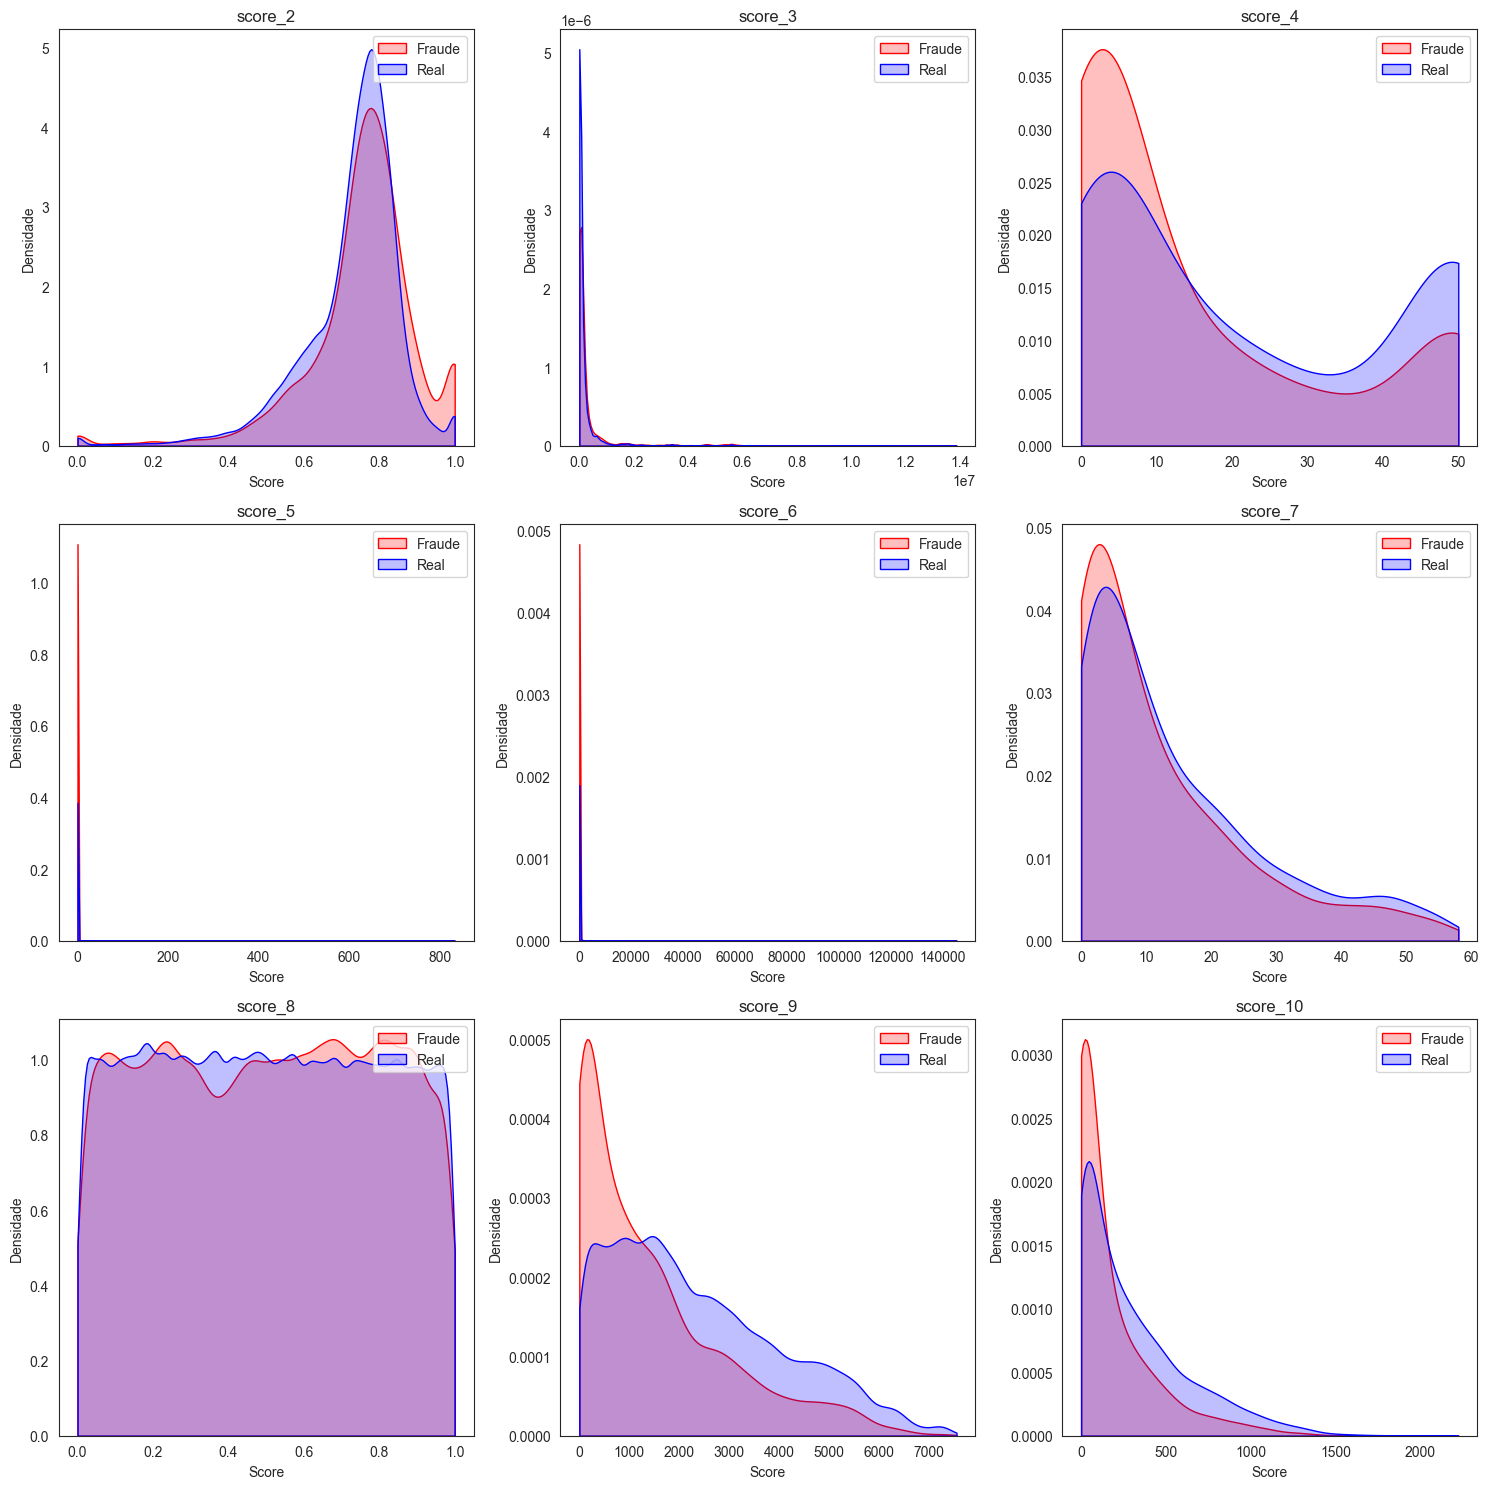

In [61]:
# Especificar as colunas de score e fraude
colunas_score = ['score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9', 'score_10']
coluna_fraude = 'fraude'

# Filtrar o DataFrame para apenas os dados de fraude e os dados reais
df_fraude = df[df[coluna_fraude] == 1]
df_real = df[df[coluna_fraude] == 0]

# Configurar o layout dos subplots
num_linhas = 3
num_colunas = 3
fig, axes = plt.subplots(num_linhas, num_colunas, figsize=(15, 15))

# Iterar sobre as colunas de score
for i, coluna_score in enumerate(colunas_score):
    # Obter os valores únicos das categorias de score
    score_values = sorted(df[coluna_score].unique())
    
    # Calcular as quantidades de transações para as categorias de score
    kde_weights_fraude = []
    kde_weights_real = []
    for score_value in score_values:
        kde_weights_fraude.append(df_fraude[df_fraude[coluna_score] == score_value].shape[0])
        kde_weights_real.append(df_real[df_real[coluna_score] == score_value].shape[0])
    
    # Calcular a posição do subplot atual
    linha = i // num_colunas
    coluna = i % num_colunas
    
    # Criar o histograma em KDE
    sns.kdeplot(x=score_values, weights=kde_weights_fraude, ax=axes[linha, coluna], fill=True, color='red', label='Fraude', common_norm=False, common_grid=True, bw_adjust=0.5, cut=0)
    sns.kdeplot(x=score_values, weights=kde_weights_real, ax=axes[linha, coluna], fill=True, color='blue', label='Real', common_norm=False, common_grid=True, bw_adjust=0.5, cut=0)
    axes[linha, coluna].set_title(coluna_score)
    axes[linha, coluna].set_xlabel("Score")
    axes[linha, coluna].set_ylabel("Densidade")
    axes[linha, coluna].legend()

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [62]:
# Teste Qui-quadrado score_2
teste_qui(df, 'score_2', 'fraude', 0.05)
# Teste Kolmogorov score_2
teste_ks(df, 'score_2', 'fraude', 0.05)

Valor-p do teste do qui-quadrado: 6.266039105317829e-37
Há evidências estatísticas para rejeitar a hipótese nula no teste do qui-quadrado.
Valor-p do teste de Kolmogorov-Smirnov: 1.2554815277967614e-78
Há evidências estatísticas para rejeitar a hipótese nula no teste de Kolmogorov-Smirnov.


In [63]:
# Teste Qui-quadrado score_3
teste_qui(df, 'score_3', 'fraude', 0.05)
# Teste Kolmogorov score_3
teste_ks(df, 'score_3', 'fraude', 0.05)

Valor-p do teste do qui-quadrado: 0.9379003705272894
Não há evidências estatísticas para rejeitar a hipótese nula no teste do qui-quadrado.
Valor-p do teste de Kolmogorov-Smirnov: 1.2341789595630104e-27
Há evidências estatísticas para rejeitar a hipótese nula no teste de Kolmogorov-Smirnov.


In [64]:
# Teste Qui-quadrado score_4
teste_qui(df, 'score_4', 'fraude', 0.05)
# Teste Kolmogorov score_4
teste_ks(df, 'score_4', 'fraude', 0.05)

Valor-p do teste do qui-quadrado: 8.662096061167963e-290
Há evidências estatísticas para rejeitar a hipótese nula no teste do qui-quadrado.
Valor-p do teste de Kolmogorov-Smirnov: 3.711719104373309e-170
Há evidências estatísticas para rejeitar a hipótese nula no teste de Kolmogorov-Smirnov.


In [65]:
# Teste Qui-quadrado score_5
teste_qui(df, 'score_5', 'fraude', 0.05)
# Teste Kolmogorov score_5
teste_ks(df, 'score_5', 'fraude', 0.05)

Valor-p do teste do qui-quadrado: 7.67463091811373e-05
Há evidências estatísticas para rejeitar a hipótese nula no teste do qui-quadrado.
Valor-p do teste de Kolmogorov-Smirnov: 1.3067725657730728e-44
Há evidências estatísticas para rejeitar a hipótese nula no teste de Kolmogorov-Smirnov.


In [66]:
# Teste Qui-quadrado score_6
teste_qui(df, 'score_6', 'fraude', 0.05)
# Teste Kolmogorov score_6
teste_ks(df, 'score_6', 'fraude', 0.05)

Valor-p do teste do qui-quadrado: 2.219565027768425e-256
Há evidências estatísticas para rejeitar a hipótese nula no teste do qui-quadrado.
Valor-p do teste de Kolmogorov-Smirnov: 0.0
Há evidências estatísticas para rejeitar a hipótese nula no teste de Kolmogorov-Smirnov.


In [67]:
# Teste Qui-quadrado score_7
teste_qui(df, 'score_7', 'fraude', 0.05)
# Teste Kolmogorov score_7
teste_ks(df, 'score_7', 'fraude', 0.05)

Valor-p do teste do qui-quadrado: 3.428685035628242e-90
Há evidências estatísticas para rejeitar a hipótese nula no teste do qui-quadrado.
Valor-p do teste de Kolmogorov-Smirnov: 5.651399372175339e-46
Há evidências estatísticas para rejeitar a hipótese nula no teste de Kolmogorov-Smirnov.


In [68]:
# Teste Qui-quadrado score_8
teste_qui(df, 'score_8', 'fraude', 0.05)
# Teste Kolmogorov score_8
teste_ks(df, 'score_8', 'fraude', 0.05)

Valor-p do teste do qui-quadrado: 0.4980576932615692
Não há evidências estatísticas para rejeitar a hipótese nula no teste do qui-quadrado.
Valor-p do teste de Kolmogorov-Smirnov: 0.2406798769129681
Não há evidências estatísticas para rejeitar a hipótese nula no teste de Kolmogorov-Smirnov.


In [69]:
# Teste Qui-quadrado score_9
teste_qui(df, 'score_9', 'fraude', 0.05)
# Teste Kolmogorov score_9
teste_ks(df, 'score_9', 'fraude', 0.05)

Valor-p do teste do qui-quadrado: 2.0565570721612188e-134
Há evidências estatísticas para rejeitar a hipótese nula no teste do qui-quadrado.
Valor-p do teste de Kolmogorov-Smirnov: 0.0
Há evidências estatísticas para rejeitar a hipótese nula no teste de Kolmogorov-Smirnov.


In [70]:
# Teste Qui-quadrado score_10
teste_qui(df, 'score_10', 'fraude', 0.05)
# Teste Kolmogorov score_10
teste_ks(df, 'score_10', 'fraude', 0.05)

Valor-p do teste do qui-quadrado: 1.910516649043324e-136
Há evidências estatísticas para rejeitar a hipótese nula no teste do qui-quadrado.
Valor-p do teste de Kolmogorov-Smirnov: 0.0
Há evidências estatísticas para rejeitar a hipótese nula no teste de Kolmogorov-Smirnov.


Em relação a scores 2, 4, 5, 6, 7, 9, 10, podemos chegar à mesma conclusão que em score_1, pois eles apresentam os mesmos resultados, para ambos os testes.

O resultado para o score_3 mostra que as distribuições dos valores de score para transações fraudulentas de acordo com o teste de Kolmogorov-Smirnov não são as mesmas. Isso indica que, com base nesse teste estatístico, a ocorrência de fraude está relacionada à pontuação da coluna "score_3". Por outro lado, os resultados do teste do qui-quadrado não mostram nenhuma correlação significativa entre as categorias de pontuação e a variável "fraude". Como ele assume que as variáveis são independentes e que as frequências esperadas são suficientemente grandes, isso pode indicar que o teste do qui-quadrado não é adequado para essa análise. Como esse foi o unico caso em que os testes tiveram diferenças em seus resultados, irei considerar como correto o resultado obtido pelo teste de Kolmogorov-Smirnov.

O score 8 apresentara valor-p maior que 0,05. Com base nesse valo-p, não há evidências estatísticas para rejeitar a hipótese nula no teste do qui-quadrado e Kolmogorov-Smirnov. Isso significa que não há uma associação significativa entre as colunas “score_8” e a variável “fraude”. Em outras palavras, não podemos concluir que as pontuações desses scores estão relacionadas à ocorrência de fraude com base nesse teste estatístico.

Como mostrado nos gráficos acima, o “score_8” é o unico que apresenta uma semelhança entre as distribuições reais e fraudulentas.

#### Entregas Doc

In [71]:
# Teste Qui-quadrado entrega_doc_1
teste_qui(df, 'entrega_doc_1', 'fraude', 0.05)
# Teste Kolmogorov entrega_doc_1
teste_ks(df, 'entrega_doc_1', 'fraude', 0.05)

Valor-p do teste do qui-quadrado: 0.0
Há evidências estatísticas para rejeitar a hipótese nula no teste do qui-quadrado.
Valor-p do teste de Kolmogorov-Smirnov: 0.0
Há evidências estatísticas para rejeitar a hipótese nula no teste de Kolmogorov-Smirnov.


In [72]:
# Teste Qui-quadrado entrega_doc_2
teste_qui(df, 'entrega_doc_2', 'fraude', 0.05)

Valor-p do teste do qui-quadrado: 0.0
Há evidências estatísticas para rejeitar a hipótese nula no teste do qui-quadrado.


In [73]:
# Teste Qui-quadrado entrega_doc_3
teste_qui(df, 'entrega_doc_3', 'fraude', 0.05)
# Teste Kolmogorov entrega_doc_3
teste_ks(df, 'entrega_doc_3', 'fraude', 0.05)

Valor-p do teste do qui-quadrado: 0.0
Há evidências estatísticas para rejeitar a hipótese nula no teste do qui-quadrado.


Valor-p do teste de Kolmogorov-Smirnov: 0.0
Há evidências estatísticas para rejeitar a hipótese nula no teste de Kolmogorov-Smirnov.


Para ambos os casos de entregas de documentos "entrega_doc_1", "entrega_doc_2", "entrega_doc_3", o p-valor do teste qui-quadrado é nulo, o que indica uma rejeição significativamente baixa da hipótese nula de que não há relação entre as features com a fraude. Isso indica que as variáveis estão muito relacionadas umas com as outras. Ou seja, a entrega dos documentos influencias nas transações de fraude.

#### Pais

In [74]:
# Teste Qui-quadrado pais
teste_qui(df, 'pais', 'fraude', 0.05)

Valor-p do teste do qui-quadrado: 7.757972296868586e-63
Há evidências estatísticas para rejeitar a hipótese nula no teste do qui-quadrado.


Com o p-valor obtido, podemos rejeitar a hipotese nula, isso indica que a feature "pais" tem uma relação estatisticamente significativa com a coluna de fraude. Sendo assim importante determinação da ocorrência de fraude.

#### Valor de compra

In [75]:
# Teste Qui-quadrado valor_compra
teste_qui(df, 'valor_compra', 'fraude', 0.05)
# Teste Kolmogorov entrega_doc_1
teste_ks(df, 'valor_compra', 'fraude', 0.05)

Valor-p do teste do qui-quadrado: 0.0
Há evidências estatísticas para rejeitar a hipótese nula no teste do qui-quadrado.
Valor-p do teste de Kolmogorov-Smirnov: 3.554151176971301e-61
Há evidências estatísticas para rejeitar a hipótese nula no teste de Kolmogorov-Smirnov.


Há uma relação estatistica significante entre as features "valor_compra" e "fraude", de acordo com o teste Qui-quadrado.

#### Horas

In [76]:
# Teste Qui-quadrado hora
teste_qui(df, 'hora', 'fraude', 0.05)
# Teste Kolmogorov entrega_doc_1
teste_ks(df, 'hora', 'fraude', 0.05)

Valor-p do teste do qui-quadrado: 5.3030288311866235e-163
Há evidências estatísticas para rejeitar a hipótese nula no teste do qui-quadrado.
Valor-p do teste de Kolmogorov-Smirnov: 8.318349796994188e-17
Há evidências estatísticas para rejeitar a hipótese nula no teste de Kolmogorov-Smirnov.


Também podemos dizer que existe uma uma relação significativa entre fraude e o horário de compra do produto.

#### Dia

In [77]:
# Teste Qui-quadrado dia
teste_qui(df, 'dia', 'fraude', 0.05)
# Teste Kolmogorov entrega_doc_1
teste_ks(df, 'dia', 'fraude', 0.05)

Valor-p do teste do qui-quadrado: 1.3308511585064855e-22
Há evidências estatísticas para rejeitar a hipótese nula no teste do qui-quadrado.
Valor-p do teste de Kolmogorov-Smirnov: 2.620297666432296e-05
Há evidências estatísticas para rejeitar a hipótese nula no teste de Kolmogorov-Smirnov.


Da mesma forma como valor_compra e hora, o dia da compra também tem relação significativa com as fraudes.

# Modelagem dos dados

## Auxiliares

In [377]:
def plot_roc_curve(model, X_val, y_val, ax = None):
    roc_auc = roc_auc_score(y_val, model.predict(X_val))
    fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:,1])

    if ax is not None:
        ax.plot(fpr, tpr, label='AUC = %0.2f)' % roc_auc)
        ax.plot([0, 1], [0, 1],'r--')
        ax.set_xlabel('Taxa de Falsos Positivos')
        ax.set_ylabel('Taxa de Verdadeiros Positivos')
        ax.legend(loc="lower right")
    else:
        plt.figure(figsize=(12, 8))
        plt.plot(fpr, tpr, label='AUC = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlabel('Taxa de Falsos Positivos')
        plt.ylabel('Taxa de Verdadeiros Positivos')
        plt.title('Curva ROC')
        plt.legend(loc="lower right")
        plt.show()

In [385]:
def plot_roc_curve_atual(X, y):
    fpr, tpr, thresholds = roc_curve(X, y)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 8))
    plt.plot(fpr, tpr, label='AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

## Modelo Atual

Primeiramente iremos analisar o modelo atual.

In [424]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state = 30)

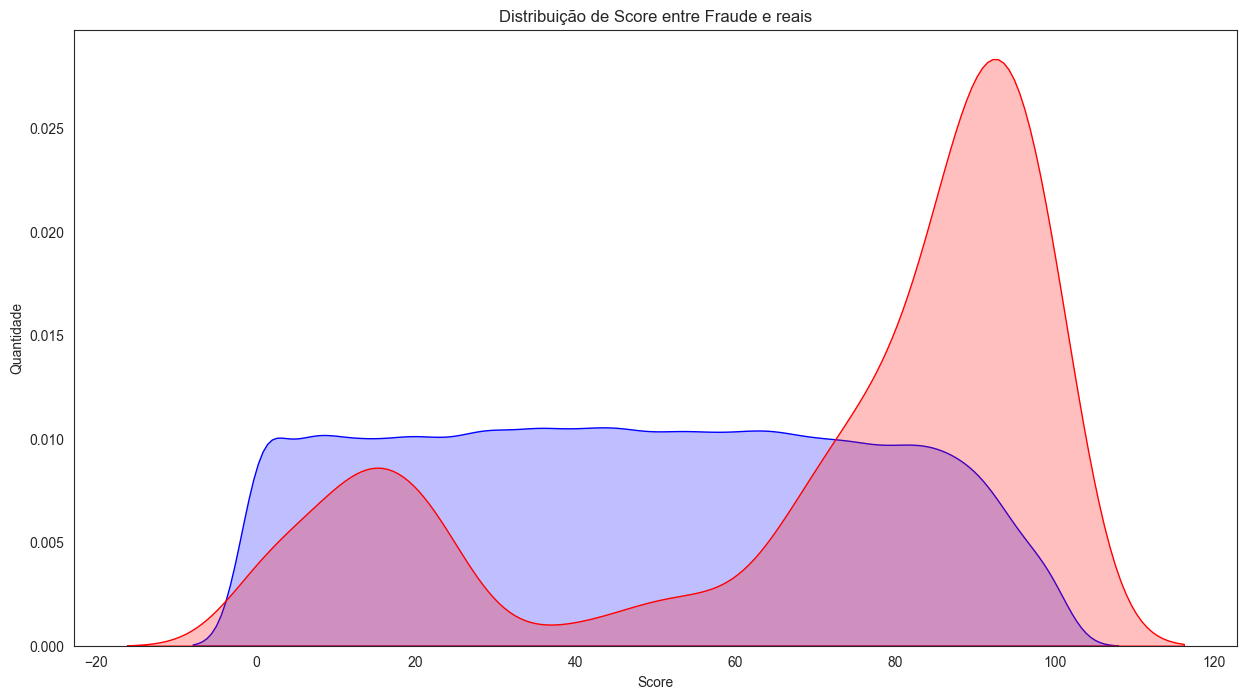

In [425]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.kdeplot(df.loc[lambda df: df.fraude == 0]['score_fraude_modelo'], ax=ax, color="blue", fill = True)
sns.kdeplot(df.loc[lambda df: df.fraude == 1]['score_fraude_modelo'], ax=ax, color="red", fill = True)

plt.title("Distribuição de Score entre Fraude e reais")
plt.xlabel("Score")
plt.ylabel("Quantidade");

Podemos observar que o modelo tem espaço para melhorias, pois há uma grande sobreposição entre as áreas de transações reais e fraudulentas. Isso significa que o modelo não consegue separar bem as duas classes e pode cometer muitos erros de classificação.

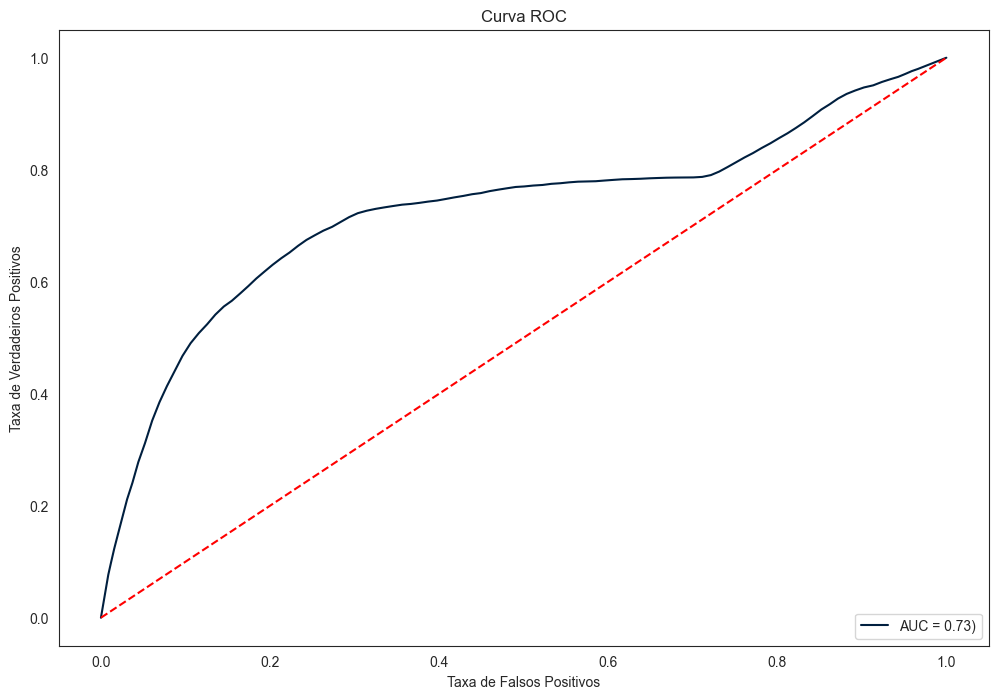

In [408]:
plot_roc_curve_atual(df['fraude'], df['score_fraude_modelo'])

Agora vamos analisar qual o ponto de corte que maximiza o lucro e visualizar as outras métricas. Consideraremos que o valor da compra está na mesma unidade de medida para todas as transações.

In [426]:
def profit_from_decision(decision_df, blocked_col, target_col, amount_col):
    """
    Calcula as perdas por fraude, as receitas e o lucro com base no dataframe de decisão dado.
    
    Parâmetros:
    - decision_df (pd.DataFrame): Dataframe contendo os dados de decisão
    - blocked_col (str): Nome da coluna que indica se uma transação foi bloqueada
    - target_col (str): Nome da coluna que indica se uma transação foi uma fraude
    - amount_col (str): Nome da coluna que indica o valor da transação
    
    Retorna:
    pd.Series: Série contendo os valores somados das perdas, receitas e lucro
    """
    
    # Criando novas colunas no dataframe de decisão
    decision_df = decision_df.assign(
        # Perdas por fraude: quando uma transação não foi bloqueada mas foi uma fraude
        fraud_losses = lambda df: ((~df[blocked_col]) & (df[target_col])) * df[amount_col],
        # Receitas: quando uma transação não foi bloqueada e não foi uma fraude
        revenues = lambda df: ((~df[blocked_col]) & (~df[target_col])) * df[amount_col] * 0.1,
        # Lucro: Receitas menos Perdas por fraude
        profit = lambda df: df["revenues"] - df["fraud_losses"]
    )
    
    # Retornando uma série com os valores somados das colunas de perdas, receitas e lucro
    return decision_df.agg({"fraud_losses": "sum", "revenues": "sum", "profit": "sum"})

In [427]:
target_col = "fraude"
prediction_col = "score_fraude_modelo"
amount_col = "valor_compra" 
blocked_col = "blocked"

possible_thresholds = np.arange(1, 100, 1)
all_decisions = []

for threshold in possible_thresholds: 
    all_decisions.append(profit_from_decision(
        df_test.assign(blocked=lambda df_test: df_test[prediction_col] >= threshold), blocked_col, 
        target_col, amount_col)
                         )
    

threshold_evaluation = pd.concat(all_decisions, axis=1, keys=[s for s in possible_thresholds]).T.rename_axis("threshold").reset_index()

threshold_evaluation

,threshold,fraud_losses,revenues,profit
0,1,772.07,3440.142,2668.072
1,2,1399.42,4381.655,2982.235
2,3,1527.66,5432.947,3905.287
3,4,3134.31,6335.524,3201.214
4,5,3268.86,7442.575,4173.715
...,...,...,...,...
94,95,80959.55,116452.097,35492.547
95,96,83526.58,117347.349,33820.769
96,97,87107.27,118266.141,31158.871
97,98,89600.47,118981.595,29381.125


In [432]:
best_threshold = threshold_evaluation.loc[threshold_evaluation["profit"].idxmax()]["threshold"]
best_decision_anterior = threshold_evaluation.loc[lambda df: df["profit"].idxmax()]
best_decision_anterior.reset_index().rename(columns = {77: 'valor $'})

,index,valor $
0,threshold,78.000
1,fraud_losses,32045.230
2,revenues,89987.403
3,profit,57942.173


A partir da análise do ponto de corte e dos dados, podemos concluir que:

* O ponto de corte de 78.000 é o valor que maximiza o lucro, ou seja, é o valor que define se uma transação deve ser bloqueada ou não, de acordo com o modelo de classificação.
* As perdas por fraude são de 32045.230, o que significa que o modelo não conseguiu bloquear todas as transações fraudulentas e permitiu que algumas delas fossem realizadas, causando um prejuízo para a empresa.
* As receitas são de 89987.403, o que significa que o modelo permitiu que a maioria das transações legítimas fossem realizadas, gerando uma receita de 10% do valor da compra para a empresa.
* O lucro é de 57942.173, o que significa que a receita foi maior do que as perdas por fraude, e que o modelo foi capaz de otimizar o lucro da empresa.

In [433]:
# Divisão do Dataframe em treino e teste
X_train = df_train.drop('fraude', axis=1)
y_train = df_train.fraude

X_test = df_test.drop('fraude', axis=1)
y_test = df_test.fraude

In [434]:
df_test['predicted'] = df_test[prediction_col] >= best_threshold
cm = confusion_matrix(df_test[target_col], df_test['predicted'])

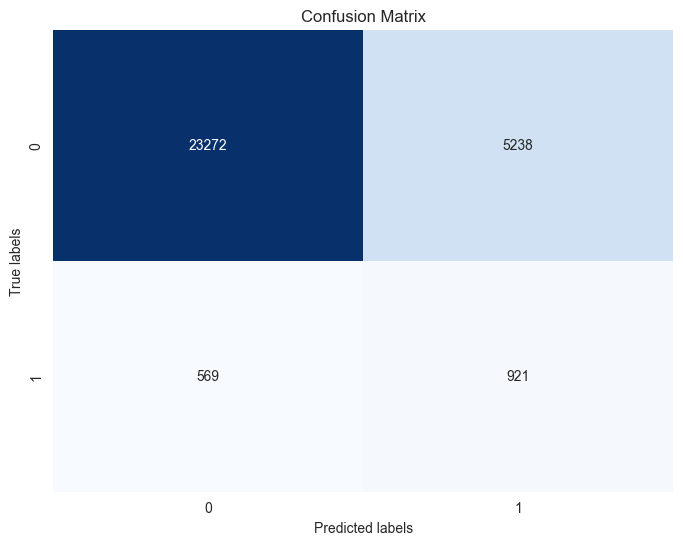

In [435]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(cm)

In [436]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]


fraud_rate = round(FN / (FN + TN), 2)
approval_rate = round((FN + TN) / (TN + FP + FN + TP), 2)

print(f"Taxa de fraude = {fraud_rate}")
print(f"Taxa de aprovação = {approval_rate}")

Taxa de fraude = 0.02
Taxa de aprovação = 0.79


Podemos observar que o modelo atual tem uma taxa de fraude de 2%, enquanto a taxa de aprovação chega a 79%.

In [437]:
# Converte as probabilidades em classificações binárias com base em um limiar (0.5 é comum)
y_pred_binary = df_test[prediction_col] >= best_threshold

print(classification_report(y_test, y_pred_binary))
print("Área sob a curva ROC: {:.2f}".format(roc_auc_score(y_test, y_pred_binary)))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     28510
           1       0.15      0.62      0.24      1490

    accuracy                           0.81     30000
   macro avg       0.56      0.72      0.56     30000
weighted avg       0.94      0.81      0.86     30000

Área sob a curva ROC: 0.72


Algumas conclusões:

* O modelo de classificação tem uma precisão de 0.15 para a classe de fraude e de 0.98 para a classe de legítimo. Isso significa que o modelo acerta 15% das vezes que classifica uma transação como fraude e 98% das vezes que classifica uma transação como legítimo. A precisão é uma medida de quão confiável é o modelo para cada classe.
* O modelo de classificação tem um recall de 0.62 para a classe de fraude e de 0.82 para a classe de legítimo. Isso significa que o modelo consegue detectar 62% das transações fraudulentas e 82% das transações legítimas. O recall é uma medida de quão sensível é o modelo para cada classe.
* O modelo de classificação tem um f1-score de 0.24 para a classe de fraude e de 0.89 para a classe de legítimo. Isso significa que o modelo tem um equilíbrio entre precisão e recall de 24% para a classe de fraude e de 89% para a classe de legítimo. O f1-score é uma medida de quão harmônico é o modelo para cada classe.
* O modelo de classificação tem uma acurácia de 0.81 para o conjunto de teste. Isso significa que o modelo acerta 81% das vezes que classifica uma transação como fraude ou legítimo. A acurácia é uma medida de quão geral é o modelo para todas as classes.
* O modelo de classificação tem uma área sob a curva ROC de 0.72 para o conjunto de teste. Isso significa que o modelo tem uma capacidade de discriminação de 72% entre as classes de fraude e legítimo. A área sob a curva ROC é uma medida de quão bom é o modelo para separar as classes.

## Pré-Processamento

O que será feito:

* Remover a feature "produto" por conter uma grande variedade de produtos.
* Remover a coluna "score_fraude_modelo", pois se trata do modelo atual usado para previsão de fraude.
* Remover a coluna "data_compra", pois só temos dois meses, desta forma não temos dados suficientes para inclui-lo.
* Realizar o Frequency Encoder e Target Encoder na coluna "categoria produto", e avaliar os resultados de cada, para selecionarmos a melhor.
* Preencher todos os valores das features númericas pela mediana, pois nenhuma delas seguem uma distribuição normal.
* Filtrar a categoria "pais" para usarmos apenas os dados do brasil "BR".
* Depois de filtrar os dados para o país "BR", podemos remover a coluna que indica o país, pois ela terá uma variação nula, ou seja, só contém a informação "BR".
* Todos os valores nulos na coluna "entrega_doc_2" serão considerados que o cliente não entregou o documento solicitado.
* Realizar um LabelEncoder: transformação de variáveis categóricas em numéricas.

In [331]:
# copiando um dataframe para as alterações do modelo
df_model = df.copy()

### Frequency Encoder e Target Encoder

In [332]:
# Calculando a frequência de ocorrência de cada categoria
# freq = df_model['categoria_produto'].value_counts(normalize=True)

# Mapeando os valores da coluna 'categoria_produto' para suas respectivas frequências
# df_model['categoria_produto_encoded'] = df['categoria_produto'].map(freq)

In [333]:
# Criando uma instância do encoder
encoder = ce.TargetEncoder(cols=['categoria_produto'])

# Ajustando o encoder aos dados de treino e transformando a coluna ‘categoria_produto’
df_model['categoria_produto_encoded'] = encoder.fit_transform(df_model['categoria_produto'], df_model['fraude'])

A codificação de alvo (target encoding) apresentou resultados melhores do que a codificação de frequência (frequency encoding) para o nosso problema, por isso iremos usá-la no nosso modelo. Essa técnica usa a informação da variável resposta (fraude) para calcular a média do alvo para cada categoria de produto, criando uma nova coluna numérica que representa a probabilidade de fraude para cada categoria. Isso pode ajudar o modelo a captar a relação entre a categoria de produto e a fraude, melhorando o seu desempenho

### Tratamento dos dados

In [334]:
df_model.head()

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,...,entrega_doc_1,entrega_doc_2,entrega_doc_3,data_compra,valor_compra,score_fraude_modelo,fraude,hora,dia,categoria_produto_encoded
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,...,1,NaN,N,2020-03-27 11:51:16,5.64,66,0,11,27,0.073090
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,...,1,Y,N,2020-04-15 19:58:08,124.71,72,0,19,15,0.026738
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,...,1,NaN,N,2020-03-25 18:13:38,339.32,95,0,18,25,0.057912
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,...,1,NaN,Y,2020-04-16 16:03:10,3.54,2,0,16,16,0.060891
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,...,1,NaN,N,2020-04-02 10:24:45,3.53,76,0,10,2,0.051070


In [335]:
# Filtrando o Dataframe para termos apenas os dados em relação ao Brasil
df_model = df_model[df_model['pais'] == 'BR']
# Removendo features que não serão usadas
df_model.drop(columns=['dia', 'score_fraude_modelo', 'data_compra',
                       'produto', 'categoria_produto', 'pais'], axis = 1, inplace = True)

In [336]:
# Substituindo os valores vazios da feature "entrega_doc_2" por "N" não entrega do documento
coluna_selecionada = ['entrega_doc_2']

# Preencher os valores vazios com 'N' nas colunas selecionadas
df_model[coluna_selecionada] = df_model[coluna_selecionada].fillna('N')

In [337]:
# Função para substituir os valores vazios pela mediana da coluna
def substituir_valores_vazios(df, colunas):
    for coluna in colunas:
        mediana = df[coluna].median()
        df[coluna] = df[coluna].fillna(mediana)
    return df

In [338]:
# Colunas que deseja preencher com as medianas
colunas_para_preencher = ['score_2', 'score_3', 'score_4', 'score_5', 'score_6',
                          'score_7', 'score_8', 'score_9', 'score_10',]

# Chamar a função para substituir os valores vazios nas colunas selecionadas
df_model = substituir_valores_vazios(df_model, colunas_para_preencher)

In [339]:
df_model.head()

,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,valor_compra,fraude,hora,categoria_produto_encoded
0,4,0.7685,94436.24,20.0,0.444828,1.0,5,0.883598,240.0,102.0,1,N,N,5.64,0,11,0.073090
1,4,0.7550,9258.50,1.0,0.000000,33.0,0,0.376019,4008.0,0.0,1,Y,N,124.71,0,19,0.026738
3,4,0.7631,18923.90,50.0,0.482385,18.0,23,0.154036,1704.0,1147.0,1,N,Y,3.54,0,16,0.060891
4,2,0.7315,5728.68,15.0,0.000000,1.0,2,0.855798,1025.0,150.0,1,N,N,3.53,0,10,0.051070
5,4,0.7359,42727.15,50.0,0.000000,47.0,1,0.571502,2798.0,506.0,1,N,Y,28.00,0,18,0.072626


In [340]:
df_model.isnull().sum()

score_1                      0
score_2                      0
score_3                      0
score_4                      0
score_5                      0
score_6                      0
score_7                      0
score_8                      0
score_9                      0
score_10                     0
entrega_doc_1                0
entrega_doc_2                0
entrega_doc_3                0
valor_compra                 0
fraude                       0
hora                         0
categoria_produto_encoded    0
dtype: int64

## LabelEncoder: transformação de variáveis categóricas em numéricas

In [341]:
def label_encode_columns(df, column_names):
    ''' implementa uma função chamada label_encode_columns que recebe um DataFrame (df) 
        e uma lista de nomes de colunas (column_names). 
        A função utiliza o LabelEncoder do pacote sklearn.
        preprocessing para realizar a codificação de rótulos em cada uma das colunas especificadas.'''
    
    lab = LabelEncoder()
    for column_name in column_names:
        df[column_name] = lab.fit_transform(df[column_name].values)
    return df

In [342]:
df_model = label_encode_columns(df_model, ['entrega_doc_2', 'entrega_doc_3'])

In [343]:
df_model.head()

,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,valor_compra,fraude,hora,categoria_produto_encoded
0,4,0.7685,94436.24,20.0,0.444828,1.0,5,0.883598,240.0,102.0,1,0,0,5.64,0,11,0.073090
1,4,0.7550,9258.50,1.0,0.000000,33.0,0,0.376019,4008.0,0.0,1,1,0,124.71,0,19,0.026738
3,4,0.7631,18923.90,50.0,0.482385,18.0,23,0.154036,1704.0,1147.0,1,0,1,3.54,0,16,0.060891
4,2,0.7315,5728.68,15.0,0.000000,1.0,2,0.855798,1025.0,150.0,1,0,0,3.53,0,10,0.051070
5,4,0.7359,42727.15,50.0,0.000000,47.0,1,0.571502,2798.0,506.0,1,0,1,28.00,0,18,0.072626


In [344]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111628 entries, 0 to 149999
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   score_1                    111628 non-null  int64  
 1   score_2                    111628 non-null  float64
 2   score_3                    111628 non-null  float64
 3   score_4                    111628 non-null  float64
 4   score_5                    111628 non-null  float64
 5   score_6                    111628 non-null  float64
 6   score_7                    111628 non-null  int64  
 7   score_8                    111628 non-null  float64
 8   score_9                    111628 non-null  float64
 9   score_10                   111628 non-null  float64
 10  entrega_doc_1              111628 non-null  int64  
 11  entrega_doc_2              111628 non-null  int32  
 12  entrega_doc_3              111628 non-null  int32  
 13  valor_compra               111628 

## Seleção de Variáveis

Agora iremos investigar se as características (features) dos dados estão relacionadas, ou seja, se elas estão ligadas. O termo "correlação" refere-se a um valor numérico que vai de zero a um e representa a direção e a força da relação entre duas variáveis. A correlação entre as variáveis é próxima de 1 porque indica que elas têm uma forte relação positiva. Em outras palavras, quando uma das variáveis aumenta, a outra também aumenta. A relação entre as variáveis é fortemente negativa se a correlação estiver próxima de zero. Em outras palavras, quando uma das variáveis aumenta, a outra diminui. Se a correlação for próxima de zero, significa que as variáveis não dependem uma da outra, ou têm uma relação fraca.

Para nosso problema irei considerar uma forte correlação positiva entre duas características quando é maior ou igual que 0.9, ou seja, os dados são quase idênticos. Quando as características são altamente dependentes umas das outras, como redundância e multicolinearidade, isso pode ser um problema para a análise. Nesse caso, podemos remover uma das características, pois ela não adiciona informações ao modelo que são relevantes.


In [345]:
def remover_recursos_correlacionados(df, limite = 0.9):
    '''identifica recursos (colunas) que estão altamente correlacionados entre si dentro de um DataFrame.
       A lista recursos_correlacionados contém pares de recursos correlacionados,
       enquanto o conjunto recursos_a_remover contém os recursos que devem ser removidos por terem alta correlação com outros recursos.'''
    
    recursos_correlacionados = []
    recursos_a_remover = set()

    matriz_de_correlação = df.corr()

    for i in range(len(matriz_de_correlação.columns)):
        for j in range(i):
            if abs(matriz_de_correlação.iloc[i, j]) > limite:
                nomedacoluna = matriz_de_correlação.columns[i]

                recursos_correlacionados.append((matriz_de_correlação.columns[i], matriz_de_correlação.columns[j]))

                recursos_a_remover.add(nomedacoluna)

    return recursos_correlacionados, recursos_a_remover

In [346]:
correlated_columns = remover_recursos_correlacionados(df_model)
correlated_columns

([], set())

Como nenhuma das características (features) dos dados apresenta uma correlação superior a 0.9, não precisamos remover nenhuma delas. Isso significa que todas as características são relevantes e independentes entre si, o que é bom para a análise.

### Particionamento dos Dados

É necessário dividir o dataframe em conjuntos de treinamento, teste e validação para avaliar e ajustar o desempenho do modelo, evitar overfitting e otimizar hiperparâmetros. Essa prática é essencial para criar modelos de Machine Learning confiáveis e com capacidade de generalização.

In [347]:
X = df_model.drop(columns=['fraude'], axis=1)
y = df_model['fraude']

In [348]:
X.head()

,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,valor_compra,hora,categoria_produto_encoded
0,4,0.7685,94436.24,20.0,0.444828,1.0,5,0.883598,240.0,102.0,1,0,0,5.64,11,0.073090
1,4,0.7550,9258.50,1.0,0.000000,33.0,0,0.376019,4008.0,0.0,1,1,0,124.71,19,0.026738
3,4,0.7631,18923.90,50.0,0.482385,18.0,23,0.154036,1704.0,1147.0,1,0,1,3.54,16,0.060891
4,2,0.7315,5728.68,15.0,0.000000,1.0,2,0.855798,1025.0,150.0,1,0,0,3.53,10,0.051070
5,4,0.7359,42727.15,50.0,0.000000,47.0,1,0.571502,2798.0,506.0,1,0,1,28.00,18,0.072626


In [349]:
y.head()

0    0
1    0
3    0
4    0
5    0
Name: fraude, dtype: int64

Precisamos verificar se existem variáveis nulas, pois valores ausentes em um conjunto de dados podem ter um impactos negativos nos modelos de machine learning que iremos usar.

In [350]:
X.isnull().sum()

score_1                      0
score_2                      0
score_3                      0
score_4                      0
score_5                      0
score_6                      0
score_7                      0
score_8                      0
score_9                      0
score_10                     0
entrega_doc_1                0
entrega_doc_2                0
entrega_doc_3                0
valor_compra                 0
hora                         0
categoria_produto_encoded    0
dtype: int64

In [351]:
y.isnull().sum()

0

In [444]:
SEED = 30

In [445]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [446]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((89302, 16), (22326, 16), (89302,), (22326,))

# Seleção dos algoritmos de Machine Learning

[LightGBM] [Info] Number of positive: 3153, number of negative: 53999
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002993 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2440
[LightGBM] [Info] Number of data points in the train set: 57152, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.055169 -> initscore=-2.840611
[LightGBM] [Info] Start training from score -2.840611
[LightGBM] [Info] Number of positive: 3181, number of negative: 53972
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2439
[LightGBM] [Info] Number of data points in the train set: 57153, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.055658 -> initscore=-2.831270
[LightGBM] [Info] Start training from score -2.831270
[LightGBM] [In

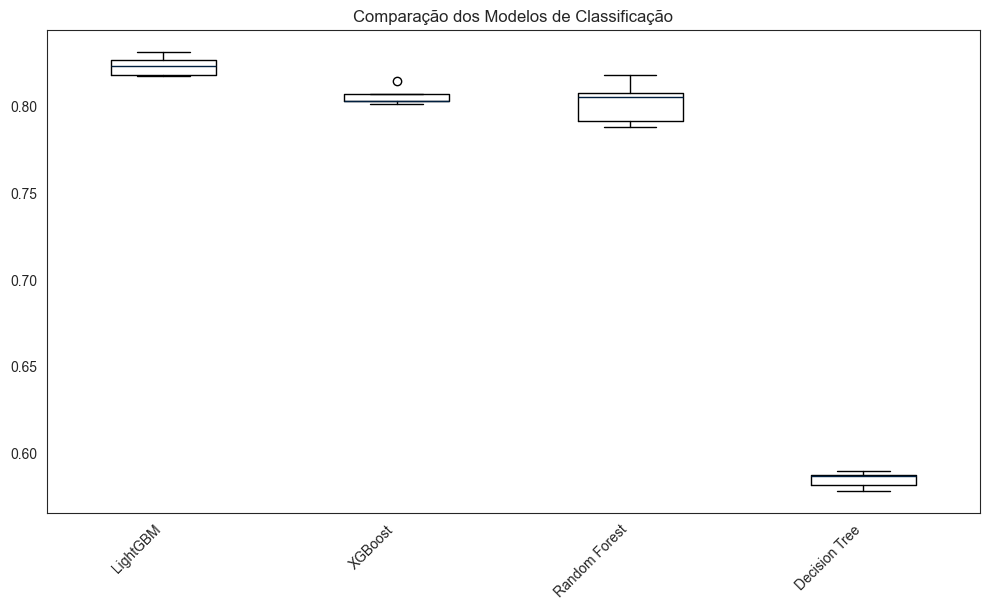

In [358]:
LGB = LGBMClassifier(random_state=SEED)
XGB = XGBClassifier(random_state=SEED)
RDF = RandomForestClassifier(random_state = SEED)
DTC = DecisionTreeClassifier(random_state=SEED)

# Modelos que serão usados
models = [LGB, XGB, RDF, DTC]

# Nome dos modelos que serão usados
model_names = ["LightGBM", "XGBoost", "Random Forest", "Decision Tree"]

results = []

# Traino dos modelos
for item in models:
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = cross_val_score(item, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    msg = "%s: %f (%f)" % (model_names[models.index(item)], cv_results.mean(), cv_results.std())
    print(msg)

# Plot comparação dos modelos
fig, ax = plt.subplots(figsize=(10, 6))  
ax.boxplot(results)
ax.set_xticklabels(model_names)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.title('Comparação dos Modelos de Classificação')
plt.show()

O LightGBM, XGBoost e o Random Forest, foram os modelos testados com melhor desempenho. Os resultados do LightGBM foram os melhores de todos. O LightGBM usa o método de Gradient Boosting, que combina várias árvores fracas em um modelo forte para otimizar uma função de perda.

## Treino do Modelo

Decidimos usar o Randomized Search CV em vez do GridSearchCV, a fim de economizar tempo de treinamento na busca dos melhores hiperparâmetros. Isso se deve ao fato de que o Randomized Search CV pode ser mais rápido e eficiente do que o GridSearchCV, pois testa um número aleatório de combinações de hiperparâmetros, em vez de todas as possíveis.

In [447]:
# Definindo os hiperparametros
params = {'num_leaves': [20, 40, 60, 80, 100],
          'max_depth': [6, 9, 12, 15, 18],
          'learning_rate': [0.005, 0.01, 0.025, 0.05],
          'n_estimators': [50, 100, 150, 200, 250],
          'min_child_samples': [5, 10, 20, 30, 40],
          'min_child_weight': [1e-7, 1e-5, 1e-3, 1e-2],
          'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
          'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
          'reg_alpha': [0, 0.001, 0.01, 0.1],
          'reg_lambda': [0, 0.001, 0.01, 0.1],
          'boosting_type': ['gbdt', 'dart']}

# Criando o modelo
lgb = LGBMClassifier(random_state = SEED)


# Criando a validação cruzada
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = SEED)

# Realizando uma pesquisa em grade (randomized search) para otimizar os hiperparâmetros do modelo LIGHTGBM
random_search = RandomizedSearchCV(lgb, param_distributions=params, scoring='roc_auc',
                                   cv=skf.split(X_train, y_train), n_iter=100)

# Treino do modelo com o random search
random_search.fit(X_train, y_train)

# Criando o modelo com hiperparâmetros otimizados usando os melhores parâmetros encontrados na pesquisa em grade

lgb = LGBMClassifier(random_state = SEED,
                     num_leaves = random_search.best_params_['num_leaves'],
                     max_depth = random_search.best_params_['max_depth'],
                     learning_rate = random_search.best_params_['learning_rate'],
                     n_estimators = random_search.best_params_['n_estimators'],
                     min_child_samples = random_search.best_params_['min_child_samples'],
                     min_child_weight = random_search.best_params_['min_child_weight'],
                     subsample = random_search.best_params_['subsample'],
                     colsample_bytree = random_search.best_params_['colsample_bytree'],
                     reg_alpha = random_search.best_params_['reg_alpha'],
                     reg_lambda = random_search.best_params_['reg_lambda'],
                     boosting_type = random_search.best_params_['boosting_type'])

# Treinando o modelo
lgb.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % random_search.best_score_)
print(random_search.best_params_)

# Usando o modelo para prever o conjunto de teste e validação
y_pred_lgb = lgb.predict(X_test)

[LightGBM] [Info] Number of positive: 3916, number of negative: 67525
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2439
[LightGBM] [Info] Number of data points in the train set: 71441, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.054814 -> initscore=-2.847427
[LightGBM] [Info] Start training from score -2.847427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain